<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compare-base-data" data-toc-modified-id="Compare-base-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compare base data</a></span><ul class="toc-item"><li><span><a href="#Zone-Schemas" data-toc-modified-id="Zone-Schemas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Zone Schemas</a></span></li><li><span><a href="#Border-Crossings" data-toc-modified-id="Border-Crossings-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Border Crossings</a></span></li></ul></li><li><span><a href="#Tour-Scheduling" data-toc-modified-id="Tour-Scheduling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tour Scheduling</a></span></li><li><span><a href="#Tour-OD-Choice" data-toc-modified-id="Tour-OD-Choice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tour OD Choice</a></span><ul class="toc-item"><li><span><a href="#Tour-Origin" data-toc-modified-id="Tour-Origin-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tour Origin</a></span></li><li><span><a href="#Tour-Destination-p-MSA-by-Origin" data-toc-modified-id="Tour-Destination-p-MSA-by-Origin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tour Destination p-MSA by Origin</a></span></li><li><span><a href="#Tour-OD-Dist-by-Tour-OD-Count-Difference" data-toc-modified-id="Tour-OD-Dist-by-Tour-OD-Count-Difference-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tour OD Dist by Tour OD Count Difference</a></span></li><li><span><a href="#Tour-Distance-by-Tour-Mode" data-toc-modified-id="Tour-Distance-by-Tour-Mode-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tour Distance by Tour Mode</a></span></li><li><span><a href="#Tour-Distance-by-Tour-Mode-by-POE" data-toc-modified-id="Tour-Distance-by-Tour-Mode-by-POE-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Tour Distance by Tour Mode by POE</a></span></li><li><span><a href="#Tour-Distance-by-Intra-MAZ-Tour-Flag" data-toc-modified-id="Tour-Distance-by-Intra-MAZ-Tour-Flag-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Tour Distance by Intra-MAZ Tour Flag</a></span></li></ul></li><li><span><a href="#Tour-Mode-Choice" data-toc-modified-id="Tour-Mode-Choice-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tour Mode Choice</a></span><ul class="toc-item"><li><span><a href="#Tour-Mode-by-POE" data-toc-modified-id="Tour-Mode-by-POE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tour Mode by POE</a></span></li><li><span><a href="#Tour-Mode-by-Tour-Purpose" data-toc-modified-id="Tour-Mode-by-Tour-Purpose-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Tour Mode by Tour Purpose</a></span></li></ul></li><li><span><a href="#Stop-Frequency" data-toc-modified-id="Stop-Frequency-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stop Frequency</a></span></li><li><span><a href="#Trip-Purpose" data-toc-modified-id="Trip-Purpose-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Trip Purpose</a></span><ul class="toc-item"><li><span><a href="#Trips-per-Tour-by-Trip-Purpose" data-toc-modified-id="Trips-per-Tour-by-Trip-Purpose-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Trips per Tour by Trip Purpose</a></span></li></ul></li><li><span><a href="#Trip-Scheduling" data-toc-modified-id="Trip-Scheduling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Trip Scheduling</a></span></li><li><span><a href="#Trip-Destination" data-toc-modified-id="Trip-Destination-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Trip Destination</a></span><ul class="toc-item"><li><span><a href="#Trip-ODs" data-toc-modified-id="Trip-ODs-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Trip ODs</a></span></li><li><span><a href="#Trip-Distance" data-toc-modified-id="Trip-Distance-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Trip Distance</a></span></li></ul></li><li><span><a href="#Trip-Mode" data-toc-modified-id="Trip-Mode-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Trip Mode</a></span><ul class="toc-item"><li><span><a href="#Trip-Mode-by-Tour-Mode" data-toc-modified-id="Trip-Mode-by-Tour-Mode-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Trip Mode by Tour Mode</a></span></li><li><span><a href="#Trip-Distance-by-Trip-Mode" data-toc-modified-id="Trip-Distance-by-Trip-Mode-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Trip Distance by Trip Mode</a></span></li></ul></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exploration</a></span></li></ul></div>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import openmatrix as omx
from matplotlib import pyplot as plt
# import geopandas as gpd
%matplotlib inline

In [3]:
import xlsxwriter
import matplotlib.ticker as ticker


# Calibration Round 3

In [4]:
Survey_trips = pd.read_csv(r'../output\Survey\trips_asim.csv')
Survey_tours = pd.read_csv(r'../output\Survey\tours_asim.csv')

mode_ids = {1: 'DRIVEALONE', 2:'SHARED2', 3:'SHARED3', 4:'WALK', 6:'WALK_TRANSIT', 10:'TAXI', 11:'TNC_SINGLE', 12:'TNC_SHARED'}
purpose_ids = {-1: 'home', 0:'work', 1:'school', 2:'cargo', 3:'shop', 4:'visit', 5:'other'}



In [5]:
skims = omx.open_file(r'..\data\traffic_skims_xborder_EA.omx')
mazs = pd.read_csv(r'..\data\mazs_xborder.csv')
mazs.set_index('MAZ', inplace=True)
maz_to_taz = mazs['TAZ']
maz_to_ext_taz = mazs['external_TAZ']
ext_maz_to_maz = mazs['original_MAZ']

In [6]:
Survey_trips = Survey_trips.merge(Survey_tours, left_on='tour_id', right_on='tour_id', suffixes=('', '_tour'))
Survey_tours = Survey_tours.merge(Survey_trips[['tour_id','sample_rate']].drop_duplicates(), on='tour_id',  how = 'left', suffixes=('', '_tour'))

In [7]:
Survey_trips['source'] = 'Survey'
Survey_tours['source'] = 'Survey'

In [8]:
asim_trips = pd.read_csv(r'..\output\final_trips.csv')
asim_tours = pd.read_csv(r'..\output\final_tours.csv')

In [9]:
asim_trips = asim_trips.merge(asim_tours, left_on='tour_id', right_on='tour_id', suffixes=('', '_tour'))

In [10]:
print(len(asim_trips),Survey_trips.sample_rate.sum())
print(len(asim_tours),Survey_tours.sample_rate.sum())

449822 424363.46689908975
113995 107564.01315012993


In [11]:
asim_tours['dest_taz'] = asim_tours['destination'].map(maz_to_taz)
asim_tours['orig_taz'] = asim_tours['origin'].map(maz_to_taz)
asim_trips['dest_taz'] = asim_trips['destination'].map(maz_to_taz)
asim_trips['orig_taz'] = asim_trips['origin'].map(maz_to_taz)

In [12]:
Survey_tours['dest_taz'] = Survey_tours['destination'].map(maz_to_taz)
Survey_tours['orig_taz'] = Survey_tours['origin'].map(maz_to_taz)
Survey_trips['dest_taz'] = Survey_trips['destination'].map(maz_to_taz)
Survey_trips['orig_taz'] = Survey_trips['origin'].map(maz_to_taz)

In [13]:
asim_trips['source'] = 'asim'
asim_tours['source'] = 'asim'

## Compare base data

### Zone Schemas 

Activitysim created new MAZ IDs for POE's

In [14]:
print((
    "max. tour origin MAZ -- Survey: {0} // asim: {1} \n"
    "max. tour dest MAZ -- Survey: {2} // asim: {3} \n"
    "max. trip orig MAZ -- Survey {4} // asim {5} \n"
    "max. trip dest MAZ -- Survey {6} // asim {7} \n").format(
        Survey_tours['origin'].max(), asim_tours['origin'].max(),
        Survey_tours['destination'].max(), asim_tours['destination'].max(),
        Survey_trips['origin'].max(), asim_trips['origin'].max(),
        Survey_trips['destination'].max(), asim_trips['destination'].max()
    )
)

max. tour origin MAZ -- Survey: 23005 // asim: 23005 
max. tour dest MAZ -- Survey: 22883.0 // asim: 22997 
max. trip orig MAZ -- Survey 23005.0 // asim 23005 
max. trip dest MAZ -- Survey 23005.0 // asim 23005 



But the TAZ IDs should still match up

In [15]:
print((
    "min. tour origin TAZ -- Survey: {0} // asim: {1} \n"
    "max. tour origin TAZ -- Survey: {2} // asim: {3} \n"
    "min. tour dest TAZ -- Survey: {4} // asim: {5} \n"
    "min. trip orig TAZ -- Survey {6} // asim {7} \n"
    "min. trip dest TAZ -- Survey {8} // asim {9} \n").format(
        Survey_tours['orig_taz'].min(), asim_tours['orig_taz'].min(),
        Survey_tours['orig_taz'].max(), asim_tours['orig_taz'].max(),
        Survey_tours['dest_taz'].min(), asim_tours['dest_taz'].min(),
        Survey_trips['orig_taz'].min(), asim_trips['orig_taz'].min(),
        Survey_trips['dest_taz'].min(), asim_trips['dest_taz'].min()
    )
)

min. tour origin TAZ -- Survey: 1 // asim: 1 
max. tour origin TAZ -- Survey: 4 // asim: 4 
min. tour dest TAZ -- Survey: 198 // asim: 15 
min. trip orig TAZ -- Survey 1 // asim 1 
min. trip dest TAZ -- Survey 1 // asim 1 



For validation we convert the new MAZ IDs back to the original because they don't exist in CTRAMP

In [16]:
new_mazs = asim_tours['origin'].unique()
# asim_tours['origin'] = asim_tours['origin'].map(ext_maz_to_maz)

In [17]:
for od in ['origin', 'destination']:
    od_mask = asim_trips[od].isin(new_mazs)
    asim_trips.loc[od_mask, od] = asim_trips.loc[od_mask, od].map(ext_maz_to_maz)

In [18]:
print((
    "max. tour origin MAZ -- Survey: {0} // asim: {1} \n"
    "max. tour dest MAZ -- Survey: {2} // asim: {3} \n"
    "max. trip orig MAZ -- Survey {4} // asim {5} \n"
    "max. trip dest MAZ -- Survey {6} // asim {7} \n").format(
        Survey_tours['origin'].max(), asim_tours['origin'].max(),
        Survey_tours['destination'].max(), asim_tours['destination'].max(),
        Survey_trips['origin'].max(), asim_trips['origin'].max(),
        Survey_trips['destination'].max(), asim_trips['destination'].max()
    )
)

max. tour origin MAZ -- Survey: 23005 // asim: 23005 
max. tour dest MAZ -- Survey: 22883.0 // asim: 22997 
max. trip orig MAZ -- Survey 23005.0 // asim 22997 
max. trip dest MAZ -- Survey 23005.0 // asim 22997 



### Border Crossings 

In [19]:
asim_tours['sentri_crossing'] = 0
asim_tours.loc[asim_tours.pass_type == 'sentri','sentri_crossing'] = 1
Survey_tours['sentri'] = 0
Survey_tours.loc[Survey_tours.pass_type == 'sentri','sentri'] = 1

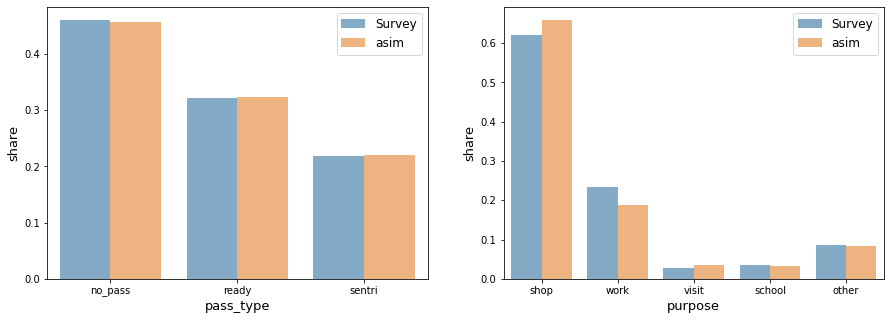

In [20]:
fig, axarr = plt.subplots(1,2,figsize=(15,5))
sentri_shares = pd.DataFrame((
    (Survey_tours.groupby('pass_type')['sample_rate'].sum()/Survey_tours['sample_rate'].sum()),
    (asim_tours['pass_type'].value_counts() / len(asim_tours))))
sentri_shares.index = ['Survey', 'asim']
sentri_shares.index.name = 'source'
sentri_shares.reset_index(inplace=True)
sentri_shares = sentri_shares.melt(id_vars='source', value_name='share', var_name='pass_type')

asim_purpose_shares = pd.DataFrame(asim_tours['tour_type'].value_counts(sort=False) / asim_tours.shape[0]).reset_index()
asim_purpose_shares.columns = ['purpose', 'share']
asim_purpose_shares['source'] = 'asim'
Survey_purpose_shares = pd.DataFrame(Survey_tours['tour_type'].value_counts(sort=False) / Survey_tours.shape[0]).reset_index()
Survey_purpose_shares.columns = ['purpose', 'share']
Survey_purpose_shares['source'] = 'Survey'
purpose_shares = pd.concat((asim_purpose_shares, Survey_purpose_shares))

sns.barplot(data=sentri_shares.sort_values('source'), x='pass_type', y='share', hue='source', ax=axarr[0],alpha=0.6)
sns.barplot(data=purpose_shares.sort_values('source'), x='purpose', y='share', hue='source', ax=axarr[1], alpha=0.6)

for ax in axarr:
    ax.legend(fontsize=12)
    ax.set_ylabel('share', fontsize=13)
    ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=10)
    ax.set_xlabel(ax.get_xlabel(), fontsize=13)

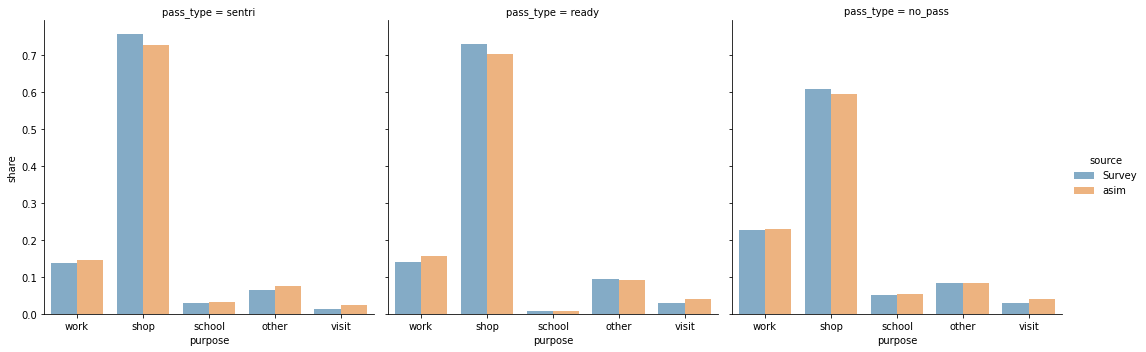

In [21]:
asim_purp_poe_shares = asim_tours.groupby(['pass_type','tour_type'])['tour_id'].count().reset_index(level='tour_type').merge(
    asim_tours.groupby('pass_type').count().rename(
        columns={'tour_id':'total'})[['total']], left_index=True, right_index=True).reset_index()
asim_purp_poe_shares['share'] = asim_purp_poe_shares['tour_id'] / asim_purp_poe_shares['total']
asim_purp_poe_shares.columns = ['pass_type','purpose','count','total','share']
asim_purp_poe_shares['source'] = 'asim'

Survey_purp_poe_shares = Survey_tours.groupby(['pass_type','tour_type'])['sample_rate'].sum().reset_index(level='tour_type').merge(
    Survey_tours.groupby('pass_type').sum().rename(
        columns={'sample_rate':'total'})[['total']], left_index=True, right_index=True).reset_index()
Survey_purp_poe_shares['share'] = Survey_purp_poe_shares['sample_rate'] / Survey_purp_poe_shares['total']
Survey_purp_poe_shares.columns = ['pass_type','purpose','count','total','share']
Survey_purp_poe_shares['source'] = 'Survey'
purp_poe_shares = pd.concat((asim_purp_poe_shares,Survey_purp_poe_shares))

sns.catplot(data=purp_poe_shares.sort_values('source'), x='purpose', y='share', hue='source', col='pass_type',kind='bar', alpha=0.6)

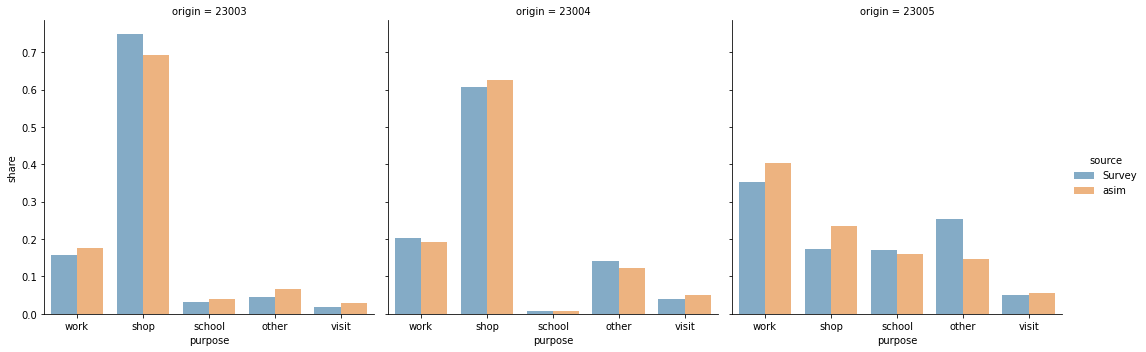

In [22]:
asim_purp_poe_shares = asim_tours.groupby(['origin','tour_type'])['tour_id'].count().reset_index(level='tour_type').merge(
    asim_tours.groupby('origin').count().rename(
        columns={'tour_id':'origin_total'})[['origin_total']], left_index=True, right_index=True).reset_index()
asim_purp_poe_shares['share'] = asim_purp_poe_shares['tour_id'] / asim_purp_poe_shares['origin_total']
asim_purp_poe_shares.columns = ['origin','purpose','count','total','share']
asim_purp_poe_shares['source'] = 'asim'

Survey_purp_poe_shares = Survey_tours.groupby(['origin','tour_type'])['sample_rate'].sum().reset_index(level='tour_type').merge(
    Survey_tours.groupby('origin').sum().rename(
        columns={'sample_rate':'origin_total'})[['origin_total']], left_index=True, right_index=True).reset_index()
Survey_purp_poe_shares['share'] = Survey_purp_poe_shares['sample_rate'] / Survey_purp_poe_shares['origin_total']
Survey_purp_poe_shares.columns = ['origin','purpose','count','total','share']
Survey_purp_poe_shares['source'] = 'Survey'
purp_poe_shares = pd.concat((asim_purp_poe_shares,Survey_purp_poe_shares))

sns.catplot(data=purp_poe_shares.sort_values('source'), x='purpose', y='share', hue='source', col='origin',kind='bar', alpha=0.6)

In [23]:
writer = pd.ExcelWriter(r'..\output\calibration_temp.xlsx', engine = 'xlsxwriter')
workbook = writer.book


In [24]:
poe_calib = purp_poe_shares.groupby(['origin','purpose','source'],as_index = False)[['share']].sum()
poe_calib.loc[poe_calib.purpose.isin(['visit','other']),'purpose'] = 'visit_other'

poe_calib = poe_calib.pivot_table(values='share', 
        index=['origin', 'purpose'], 
        columns='source', 
        aggfunc=np.sum)
poe_calib['fac'] = np.log(poe_calib['Survey']/poe_calib['asim'])
poe_calib.to_excel(writer,sheet_name = 'POE_CONSTANT')
poe_calib

source                Survey      asim       fac
origin purpose                                  
23003  school       0.032326  0.038263 -0.168629
       shop         0.747515  0.691617  0.077722
       visit_other  0.062941  0.094641 -0.407891
       work         0.157218  0.175479 -0.109883
23004  school       0.008767  0.008782 -0.001708
       shop         0.607532  0.625562 -0.029246
       visit_other  0.181720  0.172922  0.049631
       work         0.201981  0.192734  0.046859
23005  school       0.169572  0.158660  0.066519
       shop         0.172737  0.234875 -0.307284
       visit_other  0.303851  0.204033  0.398254
       work         0.353840  0.402432 -0.128682

In [25]:
poe_calib.reset_index().groupby('origin')[['Survey','asim']].sum()

source,Survey,asim
origin,,
23003,1.0,1.0
23004,1.0,1.0
23005,1.0,1.0


## Tour Scheduling 

Text(0.5, 0, 'tour departure hour')

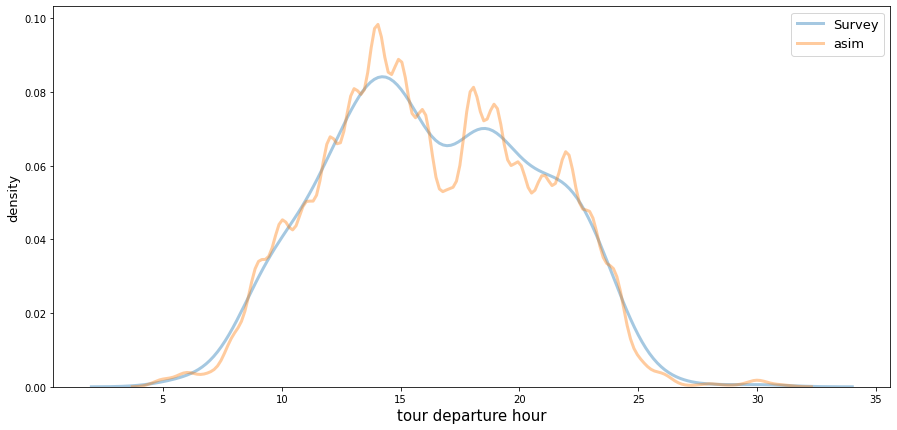

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
sns.kdeplot(data=Survey_tours, x='start',weights=Survey_tours.sample_rate, ax=ax, label='Survey', alpha=0.4, lw=3, )
sns.kdeplot(data=asim_tours, x='start', ax=ax, label='asim', alpha=0.4, lw=3)
ax.legend(fontsize=13)
ax.set_ylabel('density', fontsize=13)
ax.set_xlabel('tour departure hour', fontsize=15)

Text(0.5, 0, 'tour anchor arrival hour')

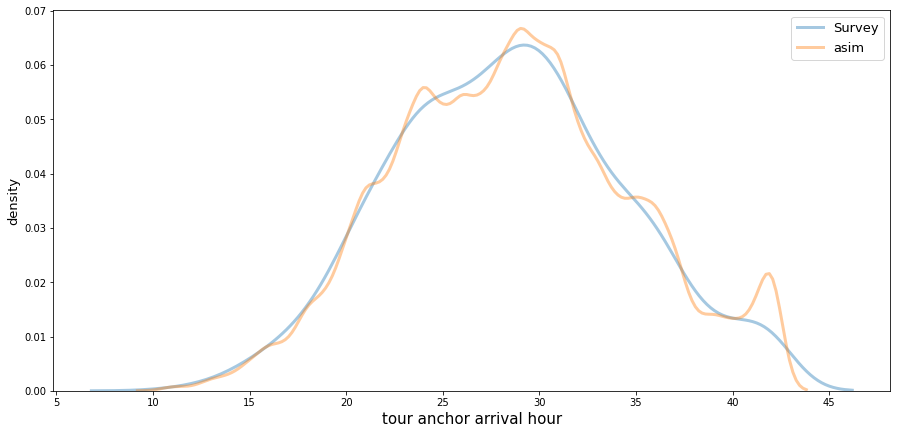

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
sns.kdeplot(data=Survey_tours, x='end', ax=ax,weights = Survey_tours.sample_rate, label='Survey', alpha=0.4, lw=3, )
sns.kdeplot(data=asim_tours, x='end', ax=ax, label='asim', alpha=0.4, lw=3)
ax.legend(fontsize=13)
ax.set_ylabel('density', fontsize=13)
ax.set_xlabel('tour anchor arrival hour', fontsize=15)

## Tour OD Choice 

### Tour Origin

Text(0.5, 0, 'POE')

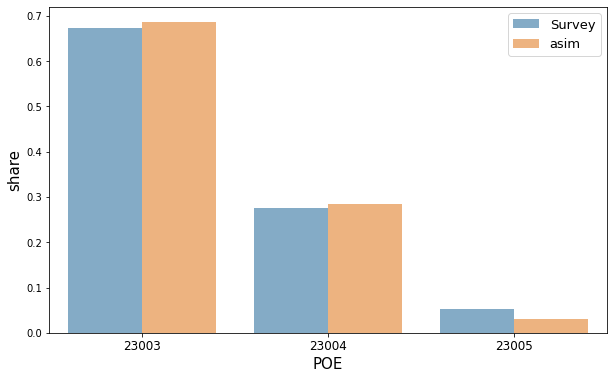

In [28]:
asim_poe_shares = pd.DataFrame(asim_tours['origin'].value_counts(sort=False) / asim_tours.shape[0]).reset_index()
asim_poe_shares.columns = ['poe', 'share']
asim_poe_shares['source'] = 'asim'
Survey_poe_shares = pd.DataFrame(Survey_tours.groupby('origin')['sample_rate'].sum() / Survey_tours.sample_rate.sum()).reset_index()
Survey_poe_shares.columns = ['poe', 'share']
Survey_poe_shares['source'] = 'Survey'
poe_shares = pd.concat((asim_poe_shares, Survey_poe_shares))
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=poe_shares.sort_values('source'), x='poe', y='share', hue='source',ax=ax, alpha=0.6)

ax.legend(fontsize=13)
ax.set_ylabel('share', fontsize=15)
ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=12)
ax.set_xlabel('POE', fontsize=15)

In [29]:
poe_calib1 = poe_shares.pivot(index = 'poe',columns = 'source', values = 'share')
poe_calib1['fac'] = np.log(poe_calib1['Survey']/poe_calib1['asim'])
poe_calib1.to_excel(writer,sheet_name = 'TECATE')

### Tour Destination p-MSA by Origin 

In [30]:
asim_tours['dest_pseudomsa'] = asim_tours['destination'].map(mazs['pseudomsa'])
Survey_tours['dest_pseudomsa'] = Survey_tours['destination'].map(mazs['pseudomsa'])
asim_tour_ods = asim_tours.groupby(['origin','dest_pseudomsa'])['tour_id'].count().reset_index()
Survey_tour_ods = Survey_tours.groupby(['origin','dest_pseudomsa'])['household_id'].count().reset_index()
Survey_tour_ods.rename(columns={'originMGRA': 'origin'}, inplace=True)

all_ods = pd.merge(
    asim_tour_ods, Survey_tour_ods, left_on=['origin','dest_pseudomsa'],
    right_on=['origin','dest_pseudomsa'], how='outer')
all_ods.rename(columns={'household_id':'Survey', 'tour_id':'asim'}, inplace=True)
all_ods['asim'] = all_ods['asim'].fillna(0)
all_ods['Survey'] = all_ods['Survey'].fillna(0)
all_ods = all_ods.melt(id_vars=['origin','dest_pseudomsa'], var_name='source', value_name='num_tours')

In [31]:
asim_tours['dest_pseudomsa'] = asim_tours['destination'].map(mazs['pseudomsa'])
Survey_tours['dest_pseudomsa'] = Survey_tours['destination'].map(mazs['pseudomsa'])
asim_tour_ods = asim_tours.groupby(['origin','dest_pseudomsa'])['tour_id'].count().reset_index()
asim_tour_ods['tour_id_num'] = asim_tour_ods['tour_id']
asim_tour_ods['tour_id'] = asim_tour_ods['tour_id']/asim_tour_ods['tour_id'].sum()
Survey_tour_ods = Survey_tours.groupby(['origin','dest_pseudomsa'])['sample_rate'].sum().reset_index()
Survey_tour_ods['sample_rate_num'] = Survey_tour_ods['sample_rate']
Survey_tour_ods['sample_rate'] = Survey_tour_ods['sample_rate']/Survey_tour_ods['sample_rate'].sum()
# Survey_tour_ods.rename(columns={'originMGRA': 'origin'}, inplace=True)

all_ods = pd.merge(
    asim_tour_ods, Survey_tour_ods, left_on=['origin','dest_pseudomsa'],
    right_on=['origin','dest_pseudomsa'], how='outer')
all_ods.rename(columns={'sample_rate':'Survey', 'tour_id':'asim'}, inplace=True)
all_ods['asim'] = all_ods['asim'].fillna(0)
all_ods['Survey'] = all_ods['Survey'].fillna(0)
all_ods = all_ods.melt(id_vars=['origin','dest_pseudomsa'], var_name='source', value_name='num_tours')

Text(0.5, 0, 'destination pseudoMSA')

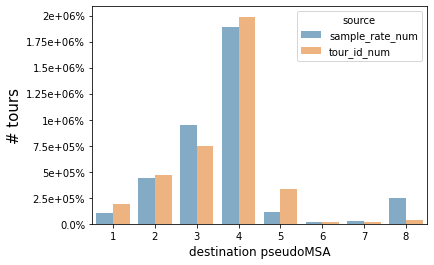

In [32]:
g = sns.barplot(
    data=all_ods[~all_ods.source.isin(['asim','Survey'])].sort_values('source'), x='dest_pseudomsa', y='num_tours',  hue='source',alpha= 0.6, ci=None)
g.set_ylabel('# tours', fontsize=15)
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.3}%'.format(x*100) ))

g.set_xlabel('destination pseudoMSA', fontsize=12)

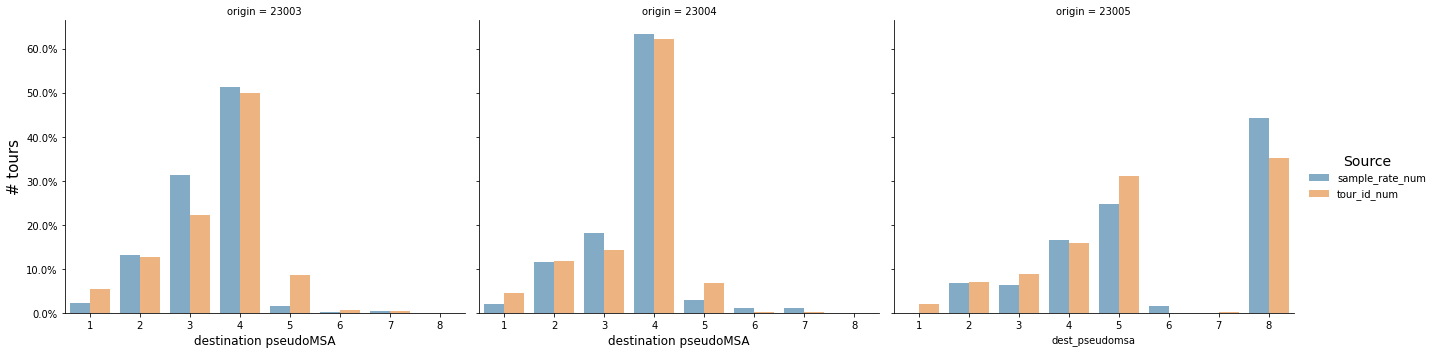

In [33]:
origin_tots = pd.DataFrame()
srclist = ['Survey','asim']
for port in all_ods.origin.unique():
    for i,src in enumerate(['sample_rate_num','tour_id_num']):
        origin_tots = origin_tots.append(pd.Series({'origin':port,
                                            'tot':all_ods[(all_ods['source'] == src) & (all_ods.origin == port)].num_tours.sum(),
                                            'source':src}),
                                           ignore_index = True)
all_ods = all_ods[~all_ods.source.isin(['asim','Survey'])].merge(origin_tots, how = 'left', on = ['origin','source'])
all_ods['num_tours'] = all_ods['num_tours']/all_ods['tot']
g = sns.catplot(
    data=all_ods.sort_values('source'), x='dest_pseudomsa', y='num_tours', hue='source', kind='bar', col='origin',
    aspect=1.2, legend_out=True, alpha=0.6)
g._legend.set_title('Source', prop={'size':14})
# g.fig.get_axes()[0].set_title('asim', fontsize=15)
# g.fig.get_axes()[1].set_title('Survey', fontsize=15)
g.axes[0,0].set_ylabel('# tours', fontsize=15)
g.axes[0,0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.3}%'.format(x*100) ))

g.axes[0,0].set_xlabel('destination pseudoMSA', fontsize=12)
_ = g.axes[0,1].set_xlabel('destination pseudoMSA', fontsize=12)

In [34]:
od_calib = all_ods[~all_ods.source.isin(['asim','Survey'])].pivot_table(index = ['origin','dest_pseudomsa'], values = 'num_tours',columns = 'source',aggfunc=np.sum)
od_calib
od_calib['fac'] = np.log(od_calib['sample_rate_num']/od_calib['tour_id_num'])
od_calib.to_excel(writer,sheet_name = 'OD_CALIB')
od_calib

C:\Users\hannah.carson\.conda\envs\asimfresh\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


source                 sample_rate_num  tour_id_num       fac
origin dest_pseudomsa                                        
23003  1                      0.021551     0.054651 -0.930538
       2                      0.131280     0.127570  0.028672
       3                      0.313433     0.222492  0.342694
       4                      0.512193     0.497934  0.028235
       5                      0.015300     0.085533 -1.721067
       6                      0.002544     0.007317 -1.056514
       7                      0.003698     0.004414 -0.176779
       8                      0.000000     0.000090      -inf
23004  1                      0.019677     0.044617 -0.818649
       2                      0.116167     0.117366 -0.010267
       3                      0.181428     0.143280  0.236059
       4                      0.632423     0.622697  0.015498
       5                      0.029567     0.068374 -0.838341
       6                      0.010692     0.002249  1.558826
       7                      0.010047     0.001356  2.002866
       8                      0.000000     0.000062      -inf
23005  1                      0.000000     0.018980      -inf
       2                      0.067150     0.069395 -0.032881
       3                      0.062230     0.087485 -0.340637
       4                      0.166318     0.158956  0.045276
       5                      0.246500     0.311388 -0.233679
       6                      0.015526     0.000593  3.264880
       7                      0.000000     0.001186      -inf
       8                      0.442276     0.352017  0.228255

In [35]:
od_calib.reset_index().groupby('origin')[['sample_rate_num','tour_id_num']].sum()

source,sample_rate_num,tour_id_num
origin,,
23003,1.0,1.0
23004,1.0,1.0
23005,1.0,1.0


In [36]:
all_ods_wide = all_ods.pivot(index=['origin','dest_pseudomsa'],columns='source')
all_ods_wide.columns = all_ods_wide.columns.get_level_values(1)
all_ods_wide.reset_index(inplace=True)
all_ods_wide['origin'] = all_ods_wide['origin'].astype(str)
all_ods_wide['dest_pseudomsa'] = all_ods_wide['dest_pseudomsa'].astype(str)

In [37]:
# g = sns.relplot(
#     data=all_ods_wide, x='sample_rate_num', y='tour_id_num', kind='scatter', col='origin', hue='dest_pseudomsa', s=200,alpha=0.5,
# #     facet_kws={'sharex':False, 'sharey':False}
# )
# for ax in g.axes[0]:
#     min_bound = min(ax.get_xlim()[0], ax.get_ylim()[0])
#     max_bound = min(ax.get_xlim()[1], ax.get_ylim()[1])
#     ax.plot([min_bound, max_bound],[min_bound, max_bound], 'k', zorder=0, lw=0.5)

### Tour OD Dist by Tour OD Count Difference

In [38]:
asim_tour_ods = asim_tours.groupby(['origin','dest_taz'])['tour_id'].count().reset_index()
Survey_tour_ods = Survey_tours.groupby(['origin','dest_taz'])['sample_rate'].sum().reset_index()

In [39]:
Survey_tour_ods.rename(columns={'originMGRA': 'origin', 'destinationTAZ': 'dest_taz'}, inplace=True)
all_ods = pd.merge(
    asim_tour_ods, Survey_tour_ods, on=['origin','dest_taz'], how='outer')
all_ods.rename(columns={'sample_rate':'Survey', 'tour_id':'asim'}, inplace=True)
all_ods['asim'] = all_ods['asim'].fillna(0)
all_ods['Survey'] = all_ods['Survey'].fillna(0)
all_ods['origin'] = all_ods['origin'].astype(str)
all_ods['dest_taz'] = all_ods['dest_taz'].astype(int)

In [40]:
all_ods['origin_taz'] = all_ods['origin'].astype(int).map(maz_to_ext_taz)
all_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][all_ods['origin_taz'] - 1, all_ods['dest_taz'] - 1]
all_ods['dest_taz'] = all_ods['dest_taz'].astype(float)
all_ods['diff'] = all_ods['Survey'] - all_ods['asim']

Text(0, 0.5, '# SURVEY - # ASIM')

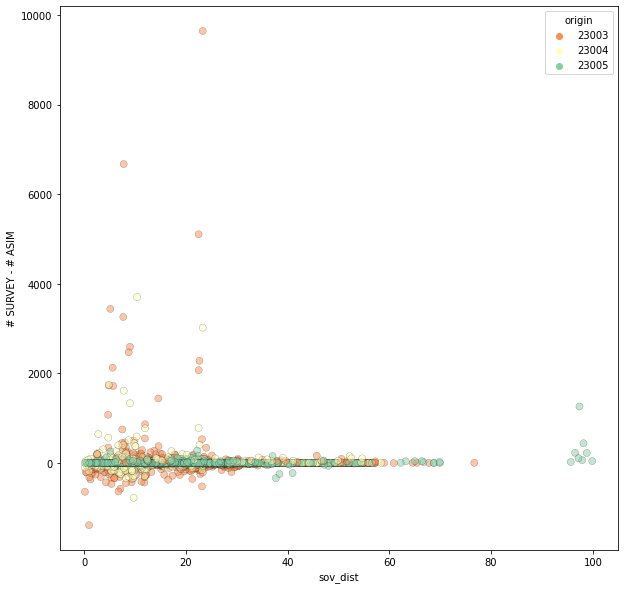

In [41]:
fig, ax = plt.subplots(figsize=(10,10))

g = sns.scatterplot(data=all_ods, x='sov_dist', y='diff',
                hue='origin', s=50, palette='Spectral', alpha=0.5, edgecolor='k',linewidth=0.3)
ax.set_ylabel("# SURVEY - # ASIM")

### Tour Distance by Tour Mode

In [42]:
asim_tours['intra_maz'] = asim_tours['origin'] == asim_tours['destination']
Survey_tours['intra_maz'] = Survey_tours['origin'] == Survey_tours['destination']

In [43]:
asim_uniq_ods = asim_tours[['orig_taz','dest_taz']].drop_duplicates()
asim_uniq_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_ods['orig_taz'].values - 1, asim_uniq_ods['dest_taz'].values - 1]
asim_tours_w_dist = asim_tours.merge(asim_uniq_ods, left_on=['orig_taz', 'dest_taz'], right_on=['orig_taz','dest_taz'])

Survey_uniq_ods = Survey_tours[['orig_taz','dest_taz']].drop_duplicates()
Survey_uniq_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][Survey_uniq_ods['orig_taz'].values - 1, Survey_uniq_ods['dest_taz'].values - 1]
Survey_tours_w_dist = Survey_tours.merge(Survey_uniq_ods, left_on=['orig_taz','dest_taz'], right_on=['orig_taz','dest_taz'])
Survey_tours_w_dist['origin'] = Survey_tours_w_dist['origin']

In [44]:
asim_tours_w_dist['sample_rate'] = 1

In [45]:
tour_dists = pd.concat((
    asim_tours_w_dist[['sov_dist','source','intra_maz', 'origin', 'tour_mode','sample_rate']],
    Survey_tours_w_dist[['sov_dist','source','intra_maz', 'origin', 'tour_mode','sample_rate']]), ignore_index=True)

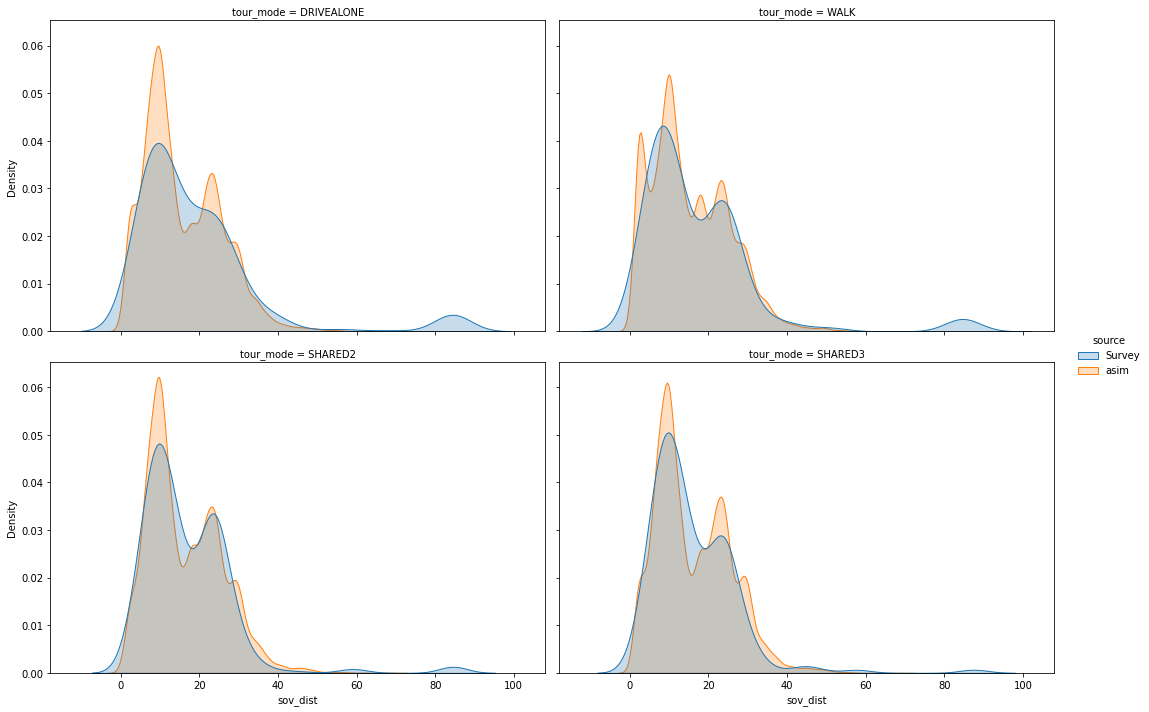

In [46]:
sns.displot(
        data=tour_dists.sort_values('source'), x='sov_dist', col='tour_mode',col_wrap=2, hue='source',
        kind='kde', fill=True, aspect=1.5, common_norm=False,weights =tour_dists.sort_values('source').sample_rate,
        facet_kws={'sharex': True, 'sharey': True, 'despine':False})

### Tour Distance by Tour Mode by POE

In [47]:
Survey_tours_w_dist['dist_weight'] = Survey_tours_w_dist['sov_dist']*Survey_tours_w_dist['sample_rate']
Survey_tours_w_dist_df = Survey_tours_w_dist.groupby('origin').sum()
Survey_tours_w_dist_df['sov_dist'] = Survey_tours_w_dist_df['dist_weight']/Survey_tours_w_dist_df['sample_rate']
mean_dist_poe = pd.concat([asim_tours_w_dist.groupby('origin')['sov_dist'].mean(),Survey_tours_w_dist_df['sov_dist']], axis = 1)
mean_dist_poe.columns = ['Asim Mean Tour Dist','Survey Mean Tour Dist']
mean_dist_poe.loc['Total'] = [asim_tours_w_dist.sov_dist.mean(), Survey_tours_w_dist['dist_weight'].sum()/Survey_tours_w_dist['sample_rate'].sum()]
mean_dist_poe['Diff'] = mean_dist_poe['Asim Mean Tour Dist'] -mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['Diff']/mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['PCT Diff'].map(lambda x: "{:.2f}%".format(x*100))
print("Average Tour Distance by POE")
mean_dist_poe

Average Tour Distance by POE


,Asim Mean Tour Dist,Survey Mean Tour Dist,Diff,PCT Diff
origin,,,,
23003,15.261143,14.648660,0.612483,4.18%
23004,15.851049,15.727212,0.123837,0.79%
23005,23.684559,56.417959,-32.733399,-58.02%
Total,15.678254,17.112452,-1.434198,-8.38%


In [48]:
Survey_tours_w_dist['dist_weight'] = Survey_tours_w_dist['sov_dist']*Survey_tours_w_dist['sample_rate']
Survey_tours_w_dist_df = Survey_tours_w_dist.groupby('tour_mode').sum()
Survey_tours_w_dist_df['sov_dist'] = Survey_tours_w_dist_df['dist_weight']/Survey_tours_w_dist_df['sample_rate']
mean_dist_poe = pd.concat([asim_tours_w_dist.groupby('tour_mode')['sov_dist'].mean(),Survey_tours_w_dist_df['sov_dist']], axis = 1)
mean_dist_poe.columns = ['Asim Mean Tour Dist','Survey Mean Tour Dist']
mean_dist_poe.loc['Total'] = [asim_tours_w_dist.sov_dist.mean(), Survey_tours_w_dist['dist_weight'].sum()/Survey_tours_w_dist['sample_rate'].sum()]
mean_dist_poe['Diff'] = mean_dist_poe['Asim Mean Tour Dist'] -mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['Diff']/mean_dist_poe['Survey Mean Tour Dist']
mean_dist_poe['PCT Diff'] = mean_dist_poe['PCT Diff'].map(lambda x: "{:.2f}%".format(x*100))
print("Average Tour Distance by Mode")
mean_dist_poe

Average Tour Distance by Mode


,Asim Mean Tour Dist,Survey Mean Tour Dist,Diff,PCT Diff
tour_mode,,,,
DRIVEALONE,15.571527,18.997917,-3.426390,-18.04%
SHARED2,16.192361,16.730265,-0.537905,-3.22%
SHARED3,16.068531,15.829875,0.238655,1.51%
WALK,15.187416,17.080314,-1.892898,-11.08%
Total,15.678254,17.112452,-1.434198,-8.38%


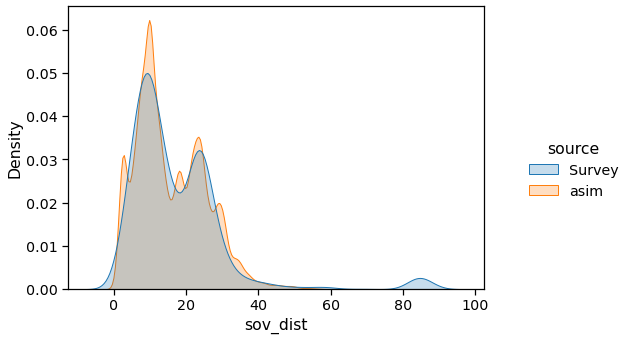

In [49]:
with sns.plotting_context("notebook",font_scale=1.3):
    sns.displot(
        data=tour_dists.sort_values('source'), x='sov_dist', hue='source',
        kind='kde', fill=True, aspect=1.5, common_norm=False,weights =tour_dists.sort_values('source').sample_rate,
        facet_kws={'sharex': True, 'sharey': True, 'despine':False, 'margin_titles':True})

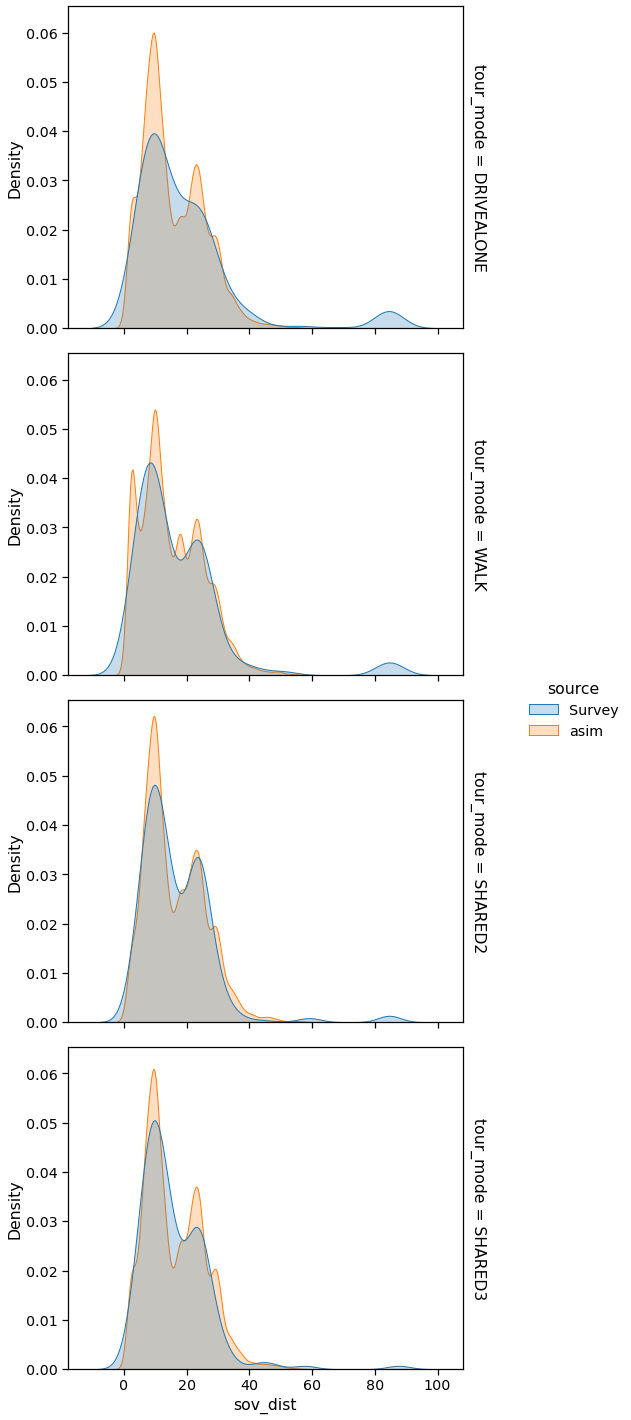

In [50]:
with sns.plotting_context("notebook",font_scale=1.3):
    sns.displot(
        data=tour_dists.sort_values('source'), x='sov_dist', row='tour_mode',hue='source',
        kind='kde', fill=True, aspect=1.5, common_norm=False,weights =tour_dists.sort_values('source').sample_rate,
        facet_kws={'sharex': True, 'sharey': True, 'despine':False, 'margin_titles':True})

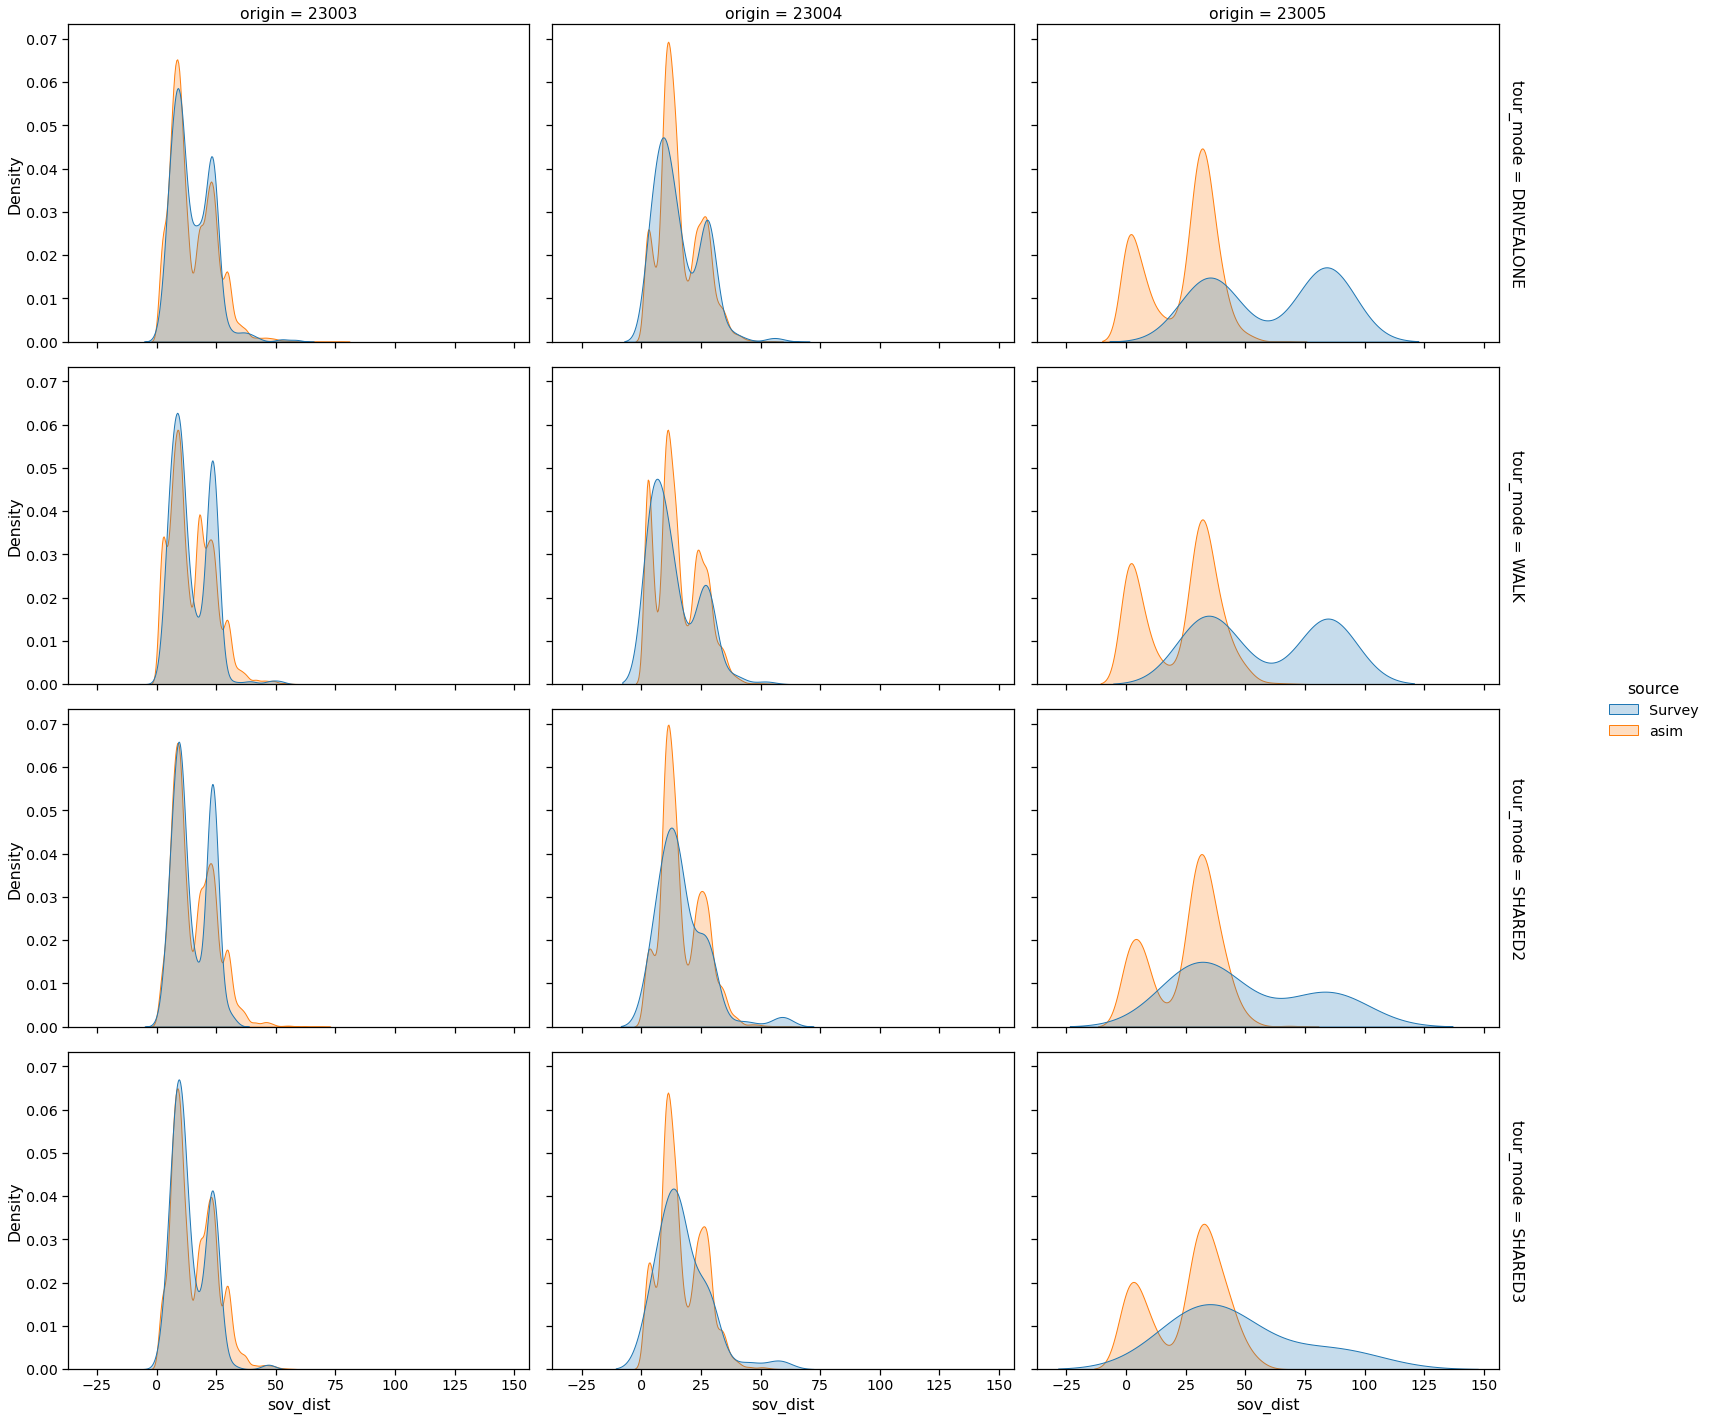

In [51]:
with sns.plotting_context("notebook",font_scale=1.3):
    sns.displot(
        data=tour_dists.sort_values('source'), x='sov_dist', col='origin',row='tour_mode',hue='source',
        kind='kde', fill=True, aspect=1.5, common_norm=False,weights =tour_dists.sort_values('source').sample_rate,
        facet_kws={'sharex': True, 'sharey': True, 'despine':False, 'margin_titles':True})

### Tour Distance by Intra-MAZ Tour Flag

Intra-MAZ tour distances are correct!

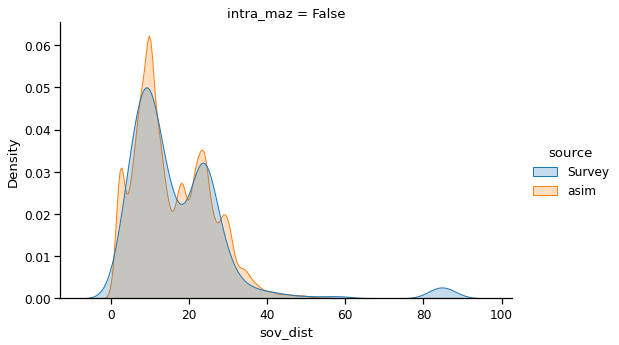

In [52]:
with sns.plotting_context("notebook",font_scale=1.1):
    sns.displot(
        data=tour_dists.sort_values('source'), x='sov_dist', col='intra_maz',hue='source', kind='kde', fill=True, aspect=1.5,
        facet_kws={'sharex': False, 'sharey': False}, weights =tour_dists.sort_values('source').sample_rate, common_norm=False)

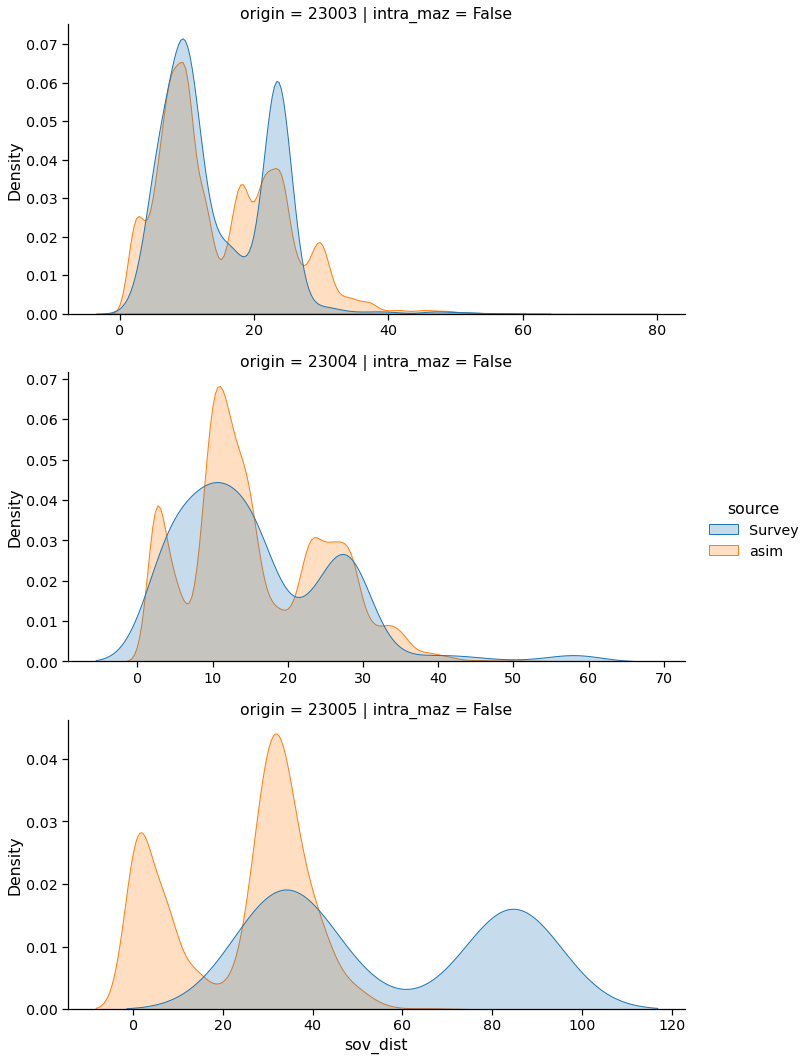

In [53]:
with sns.plotting_context("notebook",font_scale=1.3):
    sns.displot(
        data=tour_dists.sort_values('source'), x='sov_dist', col='intra_maz', row='origin', hue='source', kind='kde',fill =True,aspect=2,
        facet_kws={'sharex': False, 'sharey': False},weights =tour_dists.sort_values('source').sample_rate,   common_norm=False)

## Tour Mode Choice

Text(0.5, 0, 'tour mode')

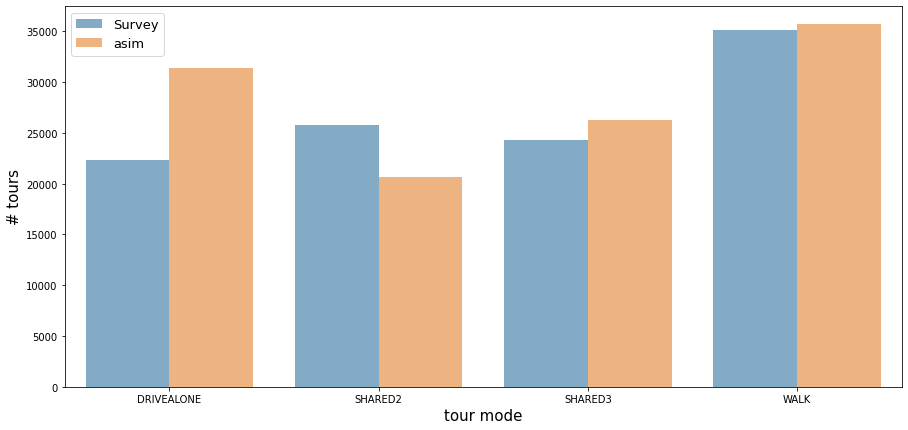

In [54]:
fig, ax = plt.subplots(figsize=(15,7))
tour_mode = asim_tours.groupby('tour_mode')['tour_id'].count()
tour_mode = pd.merge(tour_mode, Survey_tours.groupby('tour_mode')['sample_rate'].sum(), left_index=True, right_index=True).reset_index()
tour_mode.columns = ['tour_mode','asim','Survey']
tour_mode = tour_mode.melt(id_vars='tour_mode',var_name='source',value_name='num_tours')
sns.barplot(
    data=tour_mode.sort_values('source'), x='tour_mode', y='num_tours', order=['DRIVEALONE','SHARED2','SHARED3','WALK'],
    hue='source', ax=ax, alpha=0.6)
ax.legend(fontsize=13)
ax.set_ylabel('# tours', fontsize=15)
ax.set_xlabel('tour mode', fontsize=15)

In [55]:
tour_mode = asim_tours.groupby(['tour_mode','poe_id'])['tour_id'].count().reset_index()
tour_mode = pd.merge(
    tour_mode, Survey_tours.groupby(['tour_mode','poe_id'])['sample_rate'].sum().reset_index(),
    left_on=['tour_mode','poe_id'], right_on=['tour_mode','poe_id'])

In [56]:
tour_mode.columns = ['tour_mode','poe_id','asim','Survey']
tour_mode = tour_mode.melt(id_vars=['tour_mode','poe_id'],var_name='source',value_name='num_tours')

### Tour Mode by POE

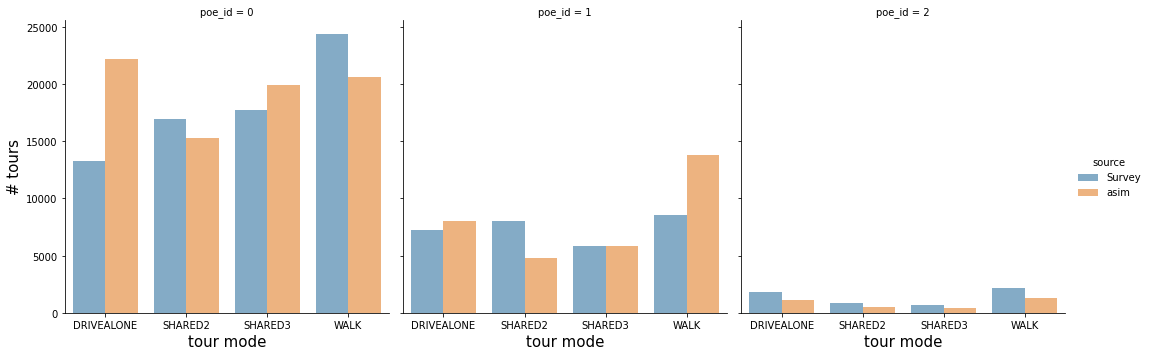

In [57]:
g = sns.catplot(
    data=tour_mode.sort_values('source'), x='tour_mode', y='num_tours', order=['DRIVEALONE','SHARED2','SHARED3','WALK'],kind='bar',col='poe_id',
    hue='source', alpha=0.6, sharey=True)
for i, ax in enumerate(g.axes[0]):
    if i == 0:
        ax.set_ylabel('# tours', fontsize=15)
    ax.set_xlabel('tour mode', fontsize=15)

In [58]:
tour_mode = asim_tours.groupby(['tour_mode','tour_type'])['tour_id'].count().reset_index()
tour_mode['num_asim'] = tour_mode['tour_id']
tour_mode['tour_id'] = tour_mode['tour_id']/tour_mode['tour_id'].sum()
survey_mode = Survey_tours.groupby(['tour_mode','tour_type'])['sample_rate'].sum().reset_index()
survey_mode['num_survey'] = survey_mode['sample_rate']
survey_mode['sample_rate'] = survey_mode['sample_rate']/survey_mode['sample_rate'].sum()
tour_mode = pd.merge(
    tour_mode, survey_mode,
    on=['tour_mode','tour_type'])
tour_mode.columns = ['tour_mode','tour_type','asim','num_asim','Survey','num_survey']
tour_mode = tour_mode.melt(id_vars=['tour_mode','tour_type'],var_name='source',value_name='num_tours')

### Tour Mode by Tour Purpose

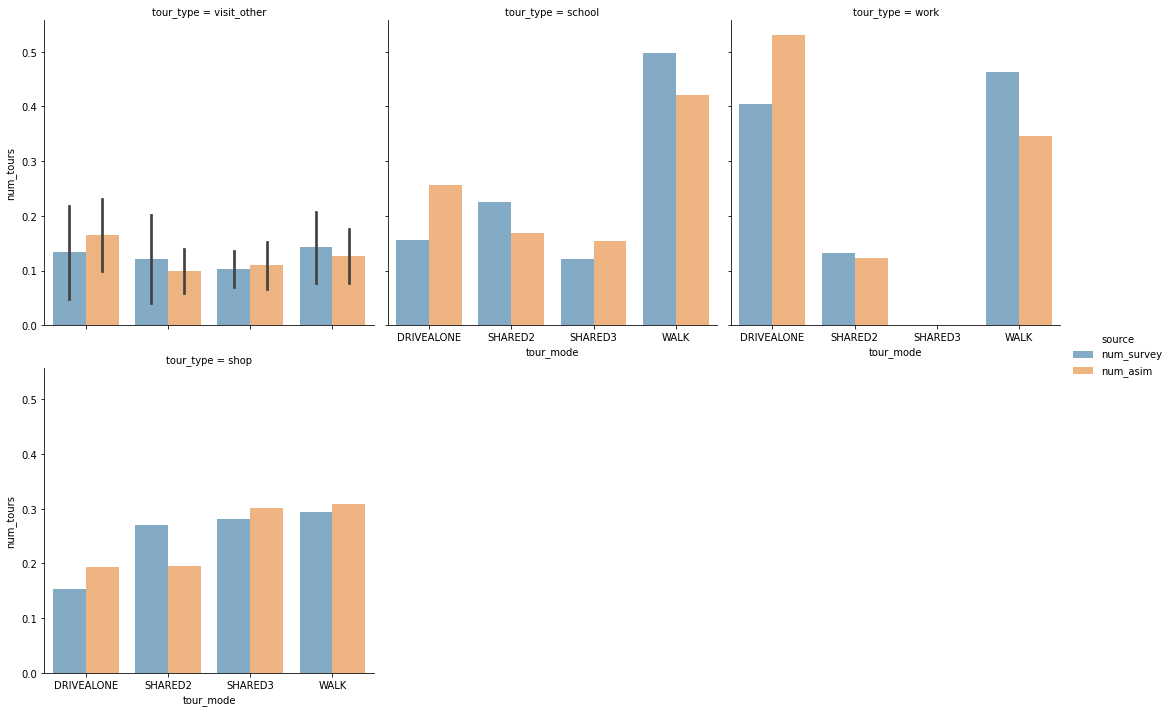

In [59]:
tour_mode.loc[tour_mode.tour_type.isin(['visit','other']),'tour_type'] = 'visit_other'

origin_tots = pd.DataFrame()
for port in tour_mode.tour_type.unique():
    for i,src in enumerate(['num_survey','num_asim']):
        origin_tots = origin_tots.append(pd.Series({'tour_type':port,
                                            'tot':tour_mode[(tour_mode['source'] == src) & (tour_mode.tour_type == port)].num_tours.sum(),
                                            'source':src}),
                                           ignore_index = True)

tour_mode = tour_mode[~tour_mode.source.isin(['asim','Survey'])].merge(origin_tots, how = 'left', on = ['tour_type','source'])
tour_mode['num_tours'] = tour_mode['num_tours']/tour_mode['tot']
g = sns.catplot(
    data=tour_mode.sort_values('source',ascending = False), x='tour_mode', y='num_tours', order=['DRIVEALONE','SHARED2','SHARED3','WALK'],kind='bar',
    col='tour_type', col_wrap=3,hue='source', alpha=0.6, sharey=True)

In [60]:
purp_calib = tour_mode.groupby(['tour_type','source','tour_mode'],as_index = False)[['num_tours']].sum()
# purp_calib.loc[purp_calib.tour_type.isin(['visit','other']),'tour_type'] = 'visit_other'
purp_calib = purp_calib.pivot_table(index = ['tour_type','tour_mode'],
                                                                              values = 'num_tours',
                                                                              columns = 'source')
purp_calib['fac'] = np.log(purp_calib['num_survey']/purp_calib['num_asim'])
purp_calib.to_excel(writer,sheet_name = 'PURP_CALIB')
# writer.save()
purp_calib

source                  num_asim  num_survey       fac
tour_type   tour_mode                                 
school      DRIVEALONE  0.256626    0.155177 -0.503053
            SHARED2     0.168460    0.225817  0.293027
            SHARED3     0.153765    0.120426 -0.244397
            WALK        0.421149    0.498581  0.168779
shop        DRIVEALONE  0.193954    0.154175 -0.229532
            SHARED2     0.195391    0.270545  0.325436
            SHARED3     0.301515    0.280594 -0.071913
            WALK        0.309140    0.294686 -0.047882
visit_other DRIVEALONE  0.329683    0.267197 -0.210147
            SHARED2     0.197328    0.242842  0.207545
            SHARED3     0.219229    0.205301 -0.065640
            WALK        0.253760    0.284660  0.114908
work        DRIVEALONE  0.530733    0.403849 -0.273219
            SHARED2     0.123494    0.132803  0.072674
            WALK        0.345773    0.463349  0.292696

In [61]:
purp_calib.reset_index().groupby('tour_type')[['num_asim','num_survey']].sum()

source,num_asim,num_survey
tour_type,,
school,1.0,1.0
shop,1.0,1.0
visit_other,1.0,1.0
work,1.0,1.0


## Stop Frequency

In [62]:
asim_tpt = asim_trips.groupby(['tour_id'])['trip_id'].count().value_counts().reset_index()
asim_tpt.columns = ['# trips', '# tours']
# asim_tpt['# trips'] = asim_tpt['# trips'] / 59 #adjust for scaling
# asim_tpt['# tours'] = asim_tpt['# tours'] * 59 #adjust for scaling
# asim_tpt['# tours'] = asim_tpt['# tours'].value_counts()
asim_tpt['source'] = 'asim'

In [63]:
Survey_tpt = Survey_trips.groupby(['tour_id']).agg({'trip_id':'count','sample_rate':'first'}).groupby('trip_id').sum().reset_index()
Survey_tpt.columns = ['# trips', '# tours']
Survey_tpt['source'] = 'Survey'

In [64]:
all_tpt = pd.concat([asim_tpt,Survey_tpt])

Text(0.5, 0, 'trips per tour')

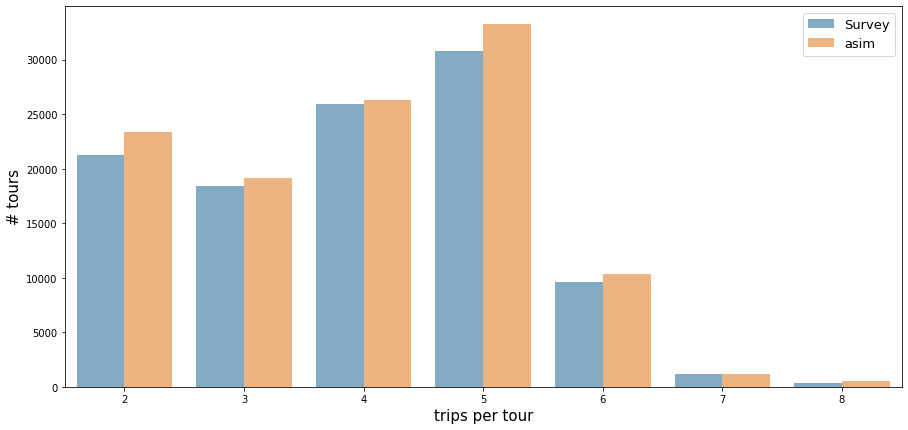

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=all_tpt.sort_values('source'), x='# trips', y='# tours', hue='source', ax=ax, alpha=0.6)
ax.legend(fontsize=13)
ax.set_ylabel('# tours', fontsize=15)
ax.set_xlabel('trips per tour', fontsize=15)

## Trip Purpose 

In [66]:
asim_purp = asim_trips.groupby(['purpose'])['trip_id'].count().reset_index()
asim_purp.columns = ['purpose', '# trips']
asim_purp['source'] = 'asim'

In [67]:
Survey_purp = Survey_trips.groupby(['purpose'])['sample_rate'].sum().reset_index()
Survey_purp.columns = ['purpose', '# trips']
Survey_purp['source'] = 'Survey'

In [68]:
all_purp = pd.concat([asim_purp, Survey_purp])

Text(0.5, 0, 'trip purpose')

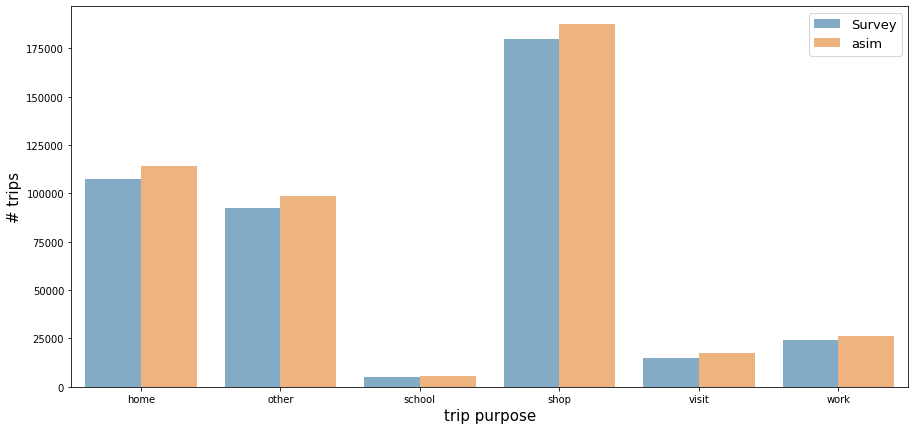

In [69]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=all_purp.sort_values('source'), x='purpose', y='# trips', hue='source', ax=ax, alpha=0.6)
ax.legend(fontsize=13)
ax.set_ylabel('# trips', fontsize=15)
ax.set_xlabel('trip purpose', fontsize=15)

### Trips per Tour by Trip Purpose 

In [70]:
asim_tpt = asim_trips.groupby(['tour_id', 'purpose'])['trip_id'].count().reset_index()
asim_tpt.rename(columns={'trip_id': 'trips per tour', 'tour_id': '# tours', 'purpose': 'trip purpose'}, inplace=True)
asim_tpt = asim_tpt.groupby(['trip purpose', 'trips per tour']).count().reset_index()
# asim_tpt['trips per tour'] = asim_tpt['trips per tour'] / 59 #adjust for scaling
# asim_tpt['# tours'] = asim_tpt['# tours'] * 59 #adjust for scaling
asim_tpt['source'] = 'asim'

In [71]:
Survey_tpt = Survey_trips.groupby(['tour_id', 'purpose']).agg({'sample_rate':'first','trip_id':'count'}).reset_index()
Survey_tpt.rename(columns={'trip_id': 'trips per tour', 'sample_rate': '# tours', 'purpose': 'trip purpose'}, inplace=True)
Survey_tpt = Survey_tpt.groupby(['trip purpose', 'trips per tour']).sum().reset_index()
Survey_tpt['source'] = 'Survey'

In [72]:
all_tpt = pd.concat([asim_tpt, Survey_tpt])

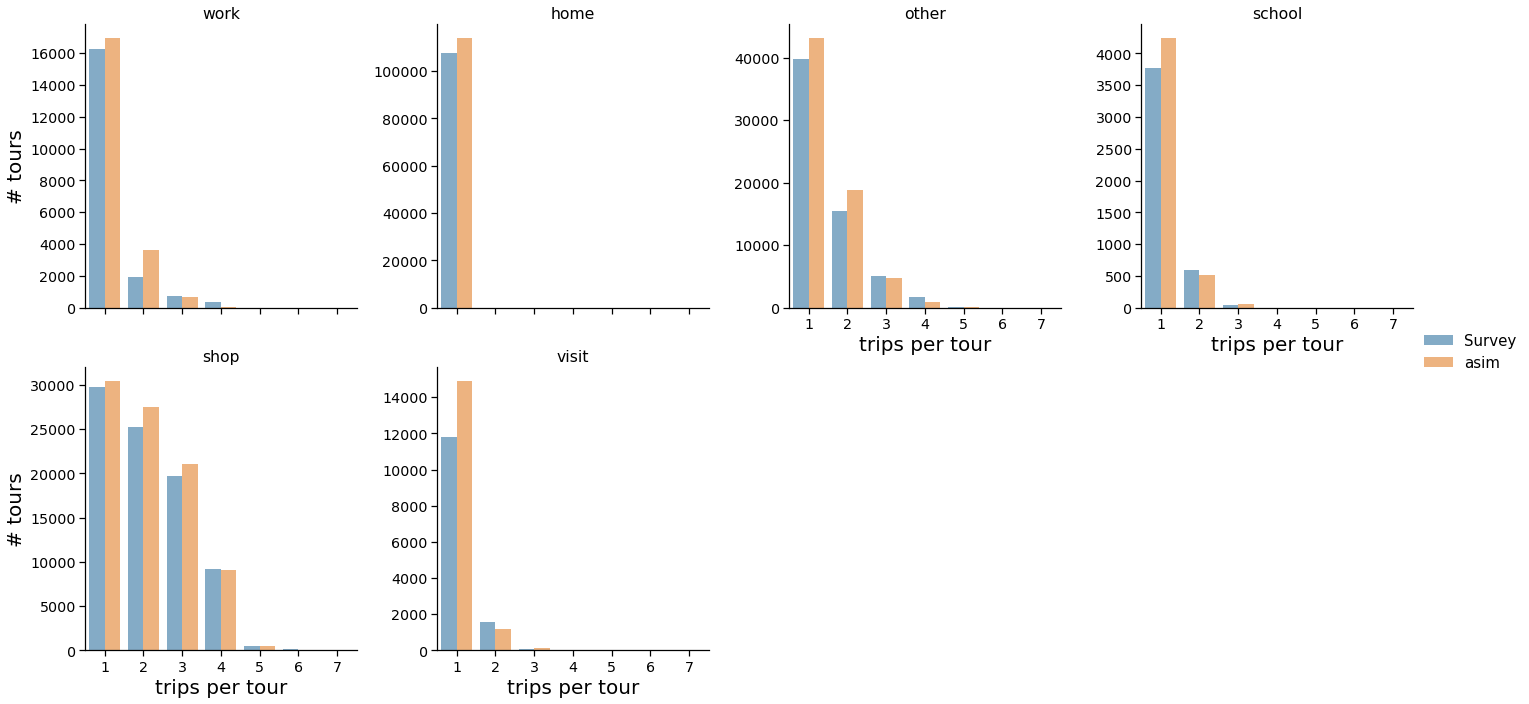

In [73]:
with sns.plotting_context("notebook",font_scale=1.3):
    g = sns.catplot(
        data=all_tpt.sort_values('source'), x='trips per tour', y='# tours', kind='bar', hue='source', col='trip purpose',
        col_wrap=4, sharey=False, alpha=0.6)
    g._legend.set_title('')
    plt.setp(g._legend.get_texts(), fontsize=15)
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("trips per tour", "# tours", fontsize=20)

## Trip Scheduling 

Text(0.5, 0, 'trip departure hour')

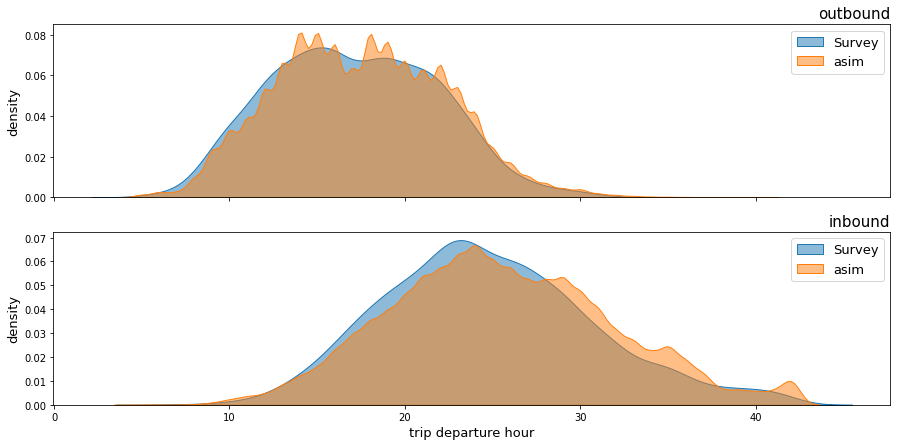

In [74]:
fig, axarr = plt.subplots(figsize=(15,7), nrows=2, sharex=True)
sns.kdeplot(data=Survey_trips[Survey_trips['outbound']], x='depart', ax=axarr[0], label='Survey', alpha=0.5, shade=True)
sns.kdeplot(data=asim_trips[asim_trips['outbound']], x='depart', ax=axarr[0], label='asim', alpha=0.5, shade=True)
axarr[0].legend(fontsize=13)
axarr[0].set_ylabel('density', fontsize=13)
axarr[0].set_xlabel('')
axarr[0].set_title('outbound', fontsize=15, loc='right')
axarr[1].set_title('inbound', fontsize=15, loc='right')
sns.kdeplot(data=Survey_trips[~Survey_trips['outbound']], x='depart',weights=Survey_trips[~Survey_trips['outbound']].sample_rate, ax=axarr[1], label='Survey', alpha=0.5, shade=True)
sns.kdeplot(data=asim_trips[~asim_trips['outbound']], x='depart', ax=axarr[1], label='asim', alpha=0.5, shade=True)
axarr[1].legend(fontsize=13)
axarr[1].set_ylabel('density', fontsize=13)
axarr[1].set_xlabel('trip departure hour', fontsize=13)

In [75]:
Survey_trips.trip_num.unique()

array([1, 2, 3, 4], dtype=int64)

Text(0.5, 0, 'trip departure hour')

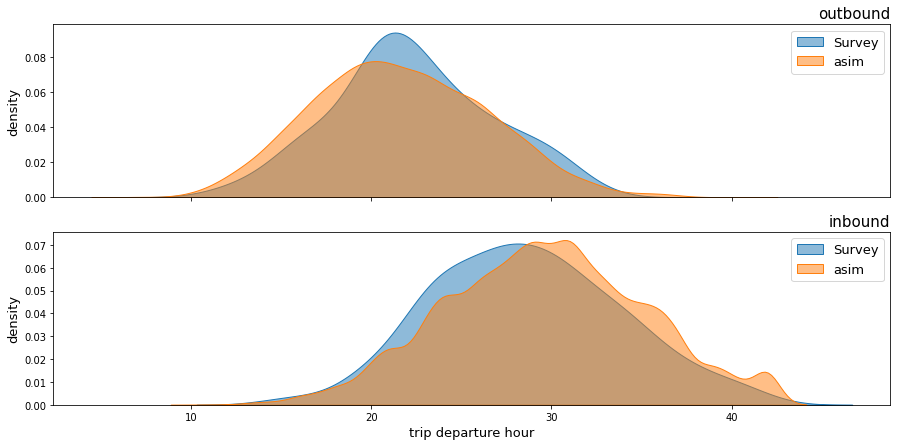

In [76]:
fig, axarr = plt.subplots(figsize=(15,7), nrows=2, sharex=True)
sns.kdeplot(data=Survey_trips[(Survey_trips['outbound']) & (Survey_trips['trip_num'] == 4)], x='depart', ax=axarr[0], label='Survey', alpha=0.5, shade=True)
sns.kdeplot(data=asim_trips[(asim_trips['outbound']) & (asim_trips['trip_num'] == 4)], x='depart', ax=axarr[0], label='asim', alpha=0.5, shade=True)
axarr[0].legend(fontsize=13)
axarr[0].set_ylabel('density', fontsize=13)
axarr[0].set_xlabel('')
axarr[0].set_title('outbound', fontsize=15, loc='right')
axarr[1].set_title('inbound', fontsize=15, loc='right')
sns.kdeplot(data=Survey_trips[~(Survey_trips['outbound']) & (Survey_trips['trip_num'] == 4)], x='depart',weights=Survey_trips[~Survey_trips['outbound']].sample_rate, ax=axarr[1], label='Survey', alpha=0.5, shade=True)
sns.kdeplot(data=asim_trips[~(asim_trips['outbound']) & (asim_trips['trip_num'] == 4)], x='depart', ax=axarr[1], label='asim', alpha=0.5, shade=True)
axarr[1].legend(fontsize=13)
axarr[1].set_ylabel('density', fontsize=13)
axarr[1].set_xlabel('trip departure hour', fontsize=13)

In [77]:
Survey_trips.columns

Index(['trip_id', 'person_id', 'household_id', 'primary_purpose', 'trip_num',
       'outbound', 'trip_count', 'destination', 'origin', 'failed', 'tour_id',
       'purpose', 'depart', 'trip_mode', 'trip_mode_choice_logsum', 'atap',
       'btap', 'path_set', 'sample_rate', 'pass_type', 'tour_type',
       'purpose_id', 'tour_category', 'number_of_participants', 'tour_num',
       'tour_count', 'household_id_tour', 'person_id_tour', 'parent_tour_id',
       'start', 'end', 'duration', 'origin_tour', 'destination_tour',
       'tour_od_logsum', 'poe_id', 'tour_mode', 'mode_choice_logsum',
       'stop_frequency', 'primary_purpose_tour', 'pass_type.1', 'source',
       'dest_taz', 'orig_taz'],
      dtype='object')

In [78]:
Survey_tours.columns

Index(['tour_id', 'pass_type', 'tour_type', 'purpose_id', 'tour_category',
       'number_of_participants', 'tour_num', 'tour_count', 'household_id',
       'person_id', 'parent_tour_id', 'start', 'end', 'duration', 'origin',
       'destination', 'tour_od_logsum', 'poe_id', 'tour_mode',
       'mode_choice_logsum', 'stop_frequency', 'primary_purpose',
       'pass_type.1', 'sample_rate', 'source', 'dest_taz', 'orig_taz',
       'sentri', 'dest_pseudomsa', 'intra_maz'],
      dtype='object')

## Trip Destination 

In [79]:
asim_trips['dest_pseudomsa'] = asim_trips['destination'].map(mazs['pseudomsa'])
asim_trips['orig_pseudomsa'] = asim_trips['origin'].map(mazs['pseudomsa'])
Survey_trips['dest_pseudomsa'] = Survey_trips['destination'].map(mazs['pseudomsa'])
Survey_trips['orig_pseudomsa'] = Survey_trips['origin'].map(mazs['pseudomsa'])

### Trip ODs

In [80]:
asim_trip_ods = asim_trips.groupby(['orig_pseudomsa','dest_pseudomsa'])['trip_id'].count().reset_index()
asim_trip_ods.columns=['origin pMSA', 'destination pMSA', '# trips']
asim_trip_ods = asim_trip_ods.pivot(index='origin pMSA', columns='destination pMSA',values='# trips')
Survey_trip_ods = Survey_trips.groupby(['orig_pseudomsa','dest_pseudomsa'])['sample_rate'].sum().reset_index()
Survey_trip_ods.columns=['origin pMSA', 'destination pMSA', '# trips']
Survey_trip_ods = Survey_trip_ods.pivot(index='origin pMSA', columns='destination pMSA',values='# trips')

Text(0.5, 0.98, 'Trip OD Counts')

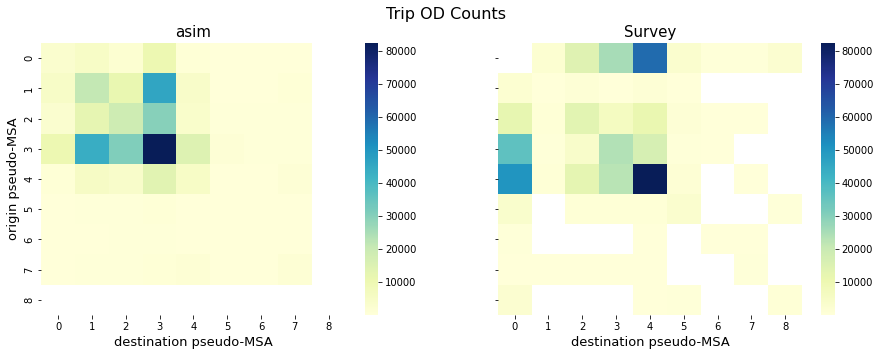

In [81]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
vmin = min(asim_trip_ods.min().min(), Survey_trip_ods.min().min())
vmax = min(asim_trip_ods.max().max(), Survey_trip_ods.max().max())

sns.heatmap(
    asim_trip_ods, ax=ax[0], cmap="YlGnBu", cbar=True,
    vmin=vmin, vmax=vmax,
#     norm=LogNorm()
)
g = sns.heatmap(
    Survey_trip_ods, ax=ax[1],cmap="YlGnBu", cbar=True,
    vmin=vmin, vmax=vmax,
#     norm=LogNorm()
)
ax[0].set_title('asim', fontsize=15)
ax[0].set_ylabel('origin pseudo-MSA', fontsize=13)
ax[0].set_xlabel('destination pseudo-MSA', fontsize=13)
ax[1].set_title('Survey', fontsize=15)
ax[1].set_ylabel('')
ax[1].set_xlabel('destination pseudo-MSA', fontsize=13)
fig.suptitle('Trip OD Counts', fontsize=16)

In [82]:
asim_trip_dest_tazs = asim_trips[asim_trips['trip_num'] != asim_trips['trip_count']].groupby('dest_taz')['trip_id'].count().reset_index()
asim_trip_dest_tazs.rename(columns={'trip_id':'asim_count'}, inplace=True)

Survey_trip_dest_tazs = Survey_trips[Survey_trips['trip_num'] != Survey_trips['trip_count']].groupby('dest_taz')['sample_rate'].sum().reset_index()
Survey_trip_dest_tazs.rename(columns={'sample_rate':'Survey_count', 'dest_taz':'dest_taz'}, inplace=True)

trip_dest_tazs = pd.merge(asim_trip_dest_tazs, Survey_trip_dest_tazs, left_on='dest_taz',right_on='dest_taz', how='outer').fillna(0)

Text(0, 0.5, 'Survey')

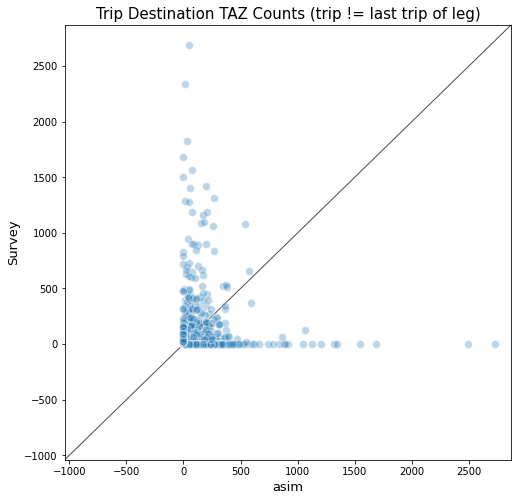

In [83]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.scatterplot(data=trip_dest_tazs, x='asim_count', y='Survey_count',ax=ax, marker='.',alpha=0.3, s=250)
min_bound = min(ax.get_xlim()[0], ax.get_ylim()[0])
max_bound = min(ax.get_xlim()[1], ax.get_ylim()[1])
ax.plot([min_bound, max_bound], [min_bound, max_bound], linewidth=1, alpha=0.7, c='k', zorder=0)
ax.set_title('Trip Destination TAZ Counts (trip != last trip of leg)', fontsize=15)
ax.set_xlim(min_bound, max_bound)
ax.set_ylim(min_bound, max_bound)
ax.set_xlabel('asim',fontsize=13)
ax.set_ylabel('Survey', fontsize=13)

### Trip Distance

In [84]:
asim_uniq_trip_ods = asim_trips[['orig_taz', 'dest_taz']].drop_duplicates()
asim_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_trip_ods['orig_taz'].values - 1, asim_uniq_trip_ods['dest_taz'].values - 1]

Survey_uniq_trip_ods = Survey_trips[['orig_taz', 'dest_taz']].drop_duplicates()
Survey_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][Survey_uniq_trip_ods['orig_taz'].values - 1, Survey_uniq_trip_ods['dest_taz'].values - 1]

asim_trips_w_dist = asim_trips.merge(asim_uniq_trip_ods, left_on=['orig_taz', 'dest_taz'], right_on=['orig_taz','dest_taz'])
Survey_trips_w_dist = Survey_trips.merge(Survey_uniq_trip_ods, left_on=['orig_taz','dest_taz'], right_on=['orig_taz','dest_taz'])

In [85]:
asim_disc_mask = asim_trips_w_dist['trip_num'].between(1, asim_trips_w_dist['trip_count'], inclusive=False)
asim_disc_trips = asim_trips_w_dist[asim_disc_mask]

C:\Users\HANNAH~1.CAR\AppData\Local\Temp\76/ipykernel_202828/4132589195.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  asim_disc_mask = asim_trips_w_dist['trip_num'].between(1, asim_trips_w_dist['trip_count'], inclusive=False)


In [86]:
Survey_disc_mask = Survey_trips_w_dist['trip_num'].between(1, Survey_trips_w_dist['trip_count'], inclusive=False)
Survey_disc_trips = Survey_trips_w_dist[Survey_disc_mask]

C:\Users\HANNAH~1.CAR\AppData\Local\Temp\76/ipykernel_202828/2845525242.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  Survey_disc_mask = Survey_trips_w_dist['trip_num'].between(1, Survey_trips_w_dist['trip_count'], inclusive=False)


Text(0.5, 1.0, 'Trip Distance (all trips)')

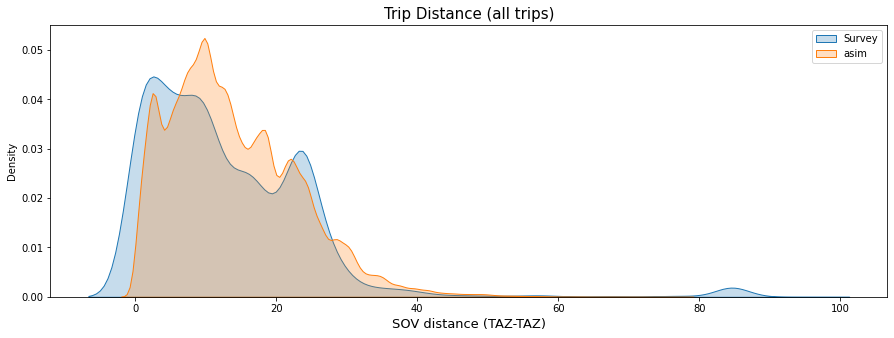

In [87]:
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(Survey_trips_w_dist['sov_dist'], label='Survey',weights = Survey_trips_w_dist.sample_rate, ax=ax, fill=True)
sns.kdeplot(asim_trips_w_dist['sov_dist'], label='asim', ax=ax, fill=True)
ax.legend()
ax.set_xlabel('SOV distance (TAZ-TAZ)', fontsize=13)
ax.set_title('Trip Distance (all trips)', fontsize=15)

Text(0.5, 1.0, 'Trip Distance (non-tour-OD trips)')

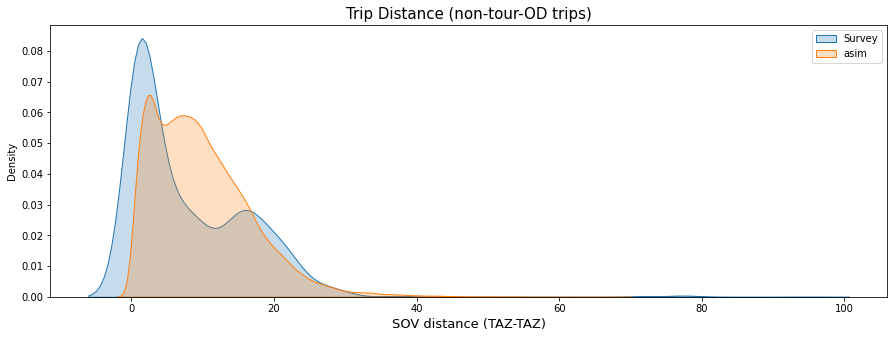

In [88]:
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(Survey_disc_trips['sov_dist'], weights=Survey_disc_trips.sample_rate,label='Survey', ax=ax, fill=True)
sns.kdeplot(asim_disc_trips['sov_dist'], label='asim', ax=ax, fill=True)
ax.legend()
ax.set_xlabel('SOV distance (TAZ-TAZ)', fontsize=13)
ax.set_title('Trip Distance (non-tour-OD trips)', fontsize=15)

In [89]:
print("Out-direction distance = dist_ik + dist_kj - dist_ij where: dist_ik = distance from last known origin to stop location dist_kj = distance from stop location to primary destination (outbound stops) or tour origin (inbound stops) dist_ij = distance from tour origin to tour primary destination (outbound stops) or from tour primary destination to tour origin (inbound stops). \nFor first stop in outbound direction, last known location is tour origin. \nFor subsequent stops, it is location of last stop in order from origin to primary destination. \nFor first stop in inbound direction, last known location is tour primary destination. \nFor subsequent stops it is location of last stop in order from primary destination to origin.")

Out-direction distance = dist_ik + dist_kj - dist_ij where: dist_ik = distance from last known origin to stop location dist_kj = distance from stop location to primary destination (outbound stops) or tour origin (inbound stops) dist_ij = distance from tour origin to tour primary destination (outbound stops) or from tour primary destination to tour origin (inbound stops). 
For first stop in outbound direction, last known location is tour origin. 
For subsequent stops, it is location of last stop in order from origin to primary destination. 
For first stop in inbound direction, last known location is tour primary destination. 
For subsequent stops it is location of last stop in order from primary destination to origin.


### Trip Out of Direction Distance

In [90]:
asim_uniq_trip_ods = asim_trips[['orig_taz', 'dest_taz']].drop_duplicates()
asim_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_trip_ods['orig_taz'].values - 1, asim_uniq_trip_ods['dest_taz'].values - 1]

Survey_uniq_trip_ods = Survey_trips[['orig_taz', 'dest_taz']].drop_duplicates()
Survey_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][Survey_uniq_trip_ods['orig_taz'].values - 1, Survey_uniq_trip_ods['dest_taz'].values - 1]

asim_trips_w_dist = asim_trips.merge(asim_uniq_trip_ods, left_on=['orig_taz', 'dest_taz'], right_on=['orig_taz','dest_taz'])
Survey_trips_w_dist = Survey_trips.merge(Survey_uniq_trip_ods, left_on=['orig_taz','dest_taz'], right_on=['orig_taz','dest_taz'])

In [91]:
Survey_trips_w_dist['outtrips'] = Survey_trips_w_dist.stop_frequency.map(lambda x: int(x[0]))
Survey_trips_w_dist['intrips'] = Survey_trips_w_dist.stop_frequency.map(lambda x: int(x.split('_')[1][0]))
Survey_trips_w_dist['outbound'] = 0
Survey_trips_w_dist = Survey_trips_w_dist.merge(Survey_tours[['tour_id','orig_taz','dest_taz']], how = 'left', on = 'tour_id',suffixes = ['','_tour'])
Survey_trips_w_dist.loc[Survey_trips_w_dist.trip_count -1 == Survey_trips_w_dist['outtrips'], 'outbound'] = 1

Survey_uniq_ods['tour_sov_dist_inbound'] = skims['SOV_NT_M_DIST__EA'][Survey_uniq_ods['dest_taz'].values - 1, Survey_uniq_ods['orig_taz'].values - 1]

Survey_trips_w_dist = Survey_trips_w_dist.merge(Survey_uniq_ods[['orig_taz','dest_taz','sov_dist','tour_sov_dist_inbound']].rename(columns = {'sov_dist':'tour_sov_dist','dest_taz':'dest_taz_tour','orig_taz':'orig_taz_tour'}), how = 'left',on=['orig_taz_tour', 'dest_taz_tour'])

# asim_uniq_trip_ods = asim_trips[['orig_taz', 'dest_taz']].drop_duplicates()
# asim_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_trip_ods['orig_taz'].values - 1, asim_uniq_trip_ods['dest_taz'].values - 1]



Survey_trips_uniq_outkj = Survey_trips_w_dist[['dest_taz','dest_taz_tour',]].drop_duplicates()
Survey_trips_uniq_inkj = Survey_trips_w_dist[['dest_taz','orig_taz_tour']].drop_duplicates()

Survey_trips_uniq_outkj['outbound_kj'] = skims['SOV_NT_M_DIST__EA'][Survey_trips_uniq_outkj['dest_taz'].values - 1, Survey_trips_uniq_outkj['dest_taz_tour'].values - 1]
Survey_trips_uniq_inkj['inbound_kj'] = skims['SOV_NT_M_DIST__EA'][Survey_trips_uniq_inkj['dest_taz'].values - 1, Survey_trips_uniq_inkj['orig_taz_tour'].values - 1]
Survey_trips_uniq_outkj['outbound'] = 1
Survey_trips_uniq_inkj['outbound'] = 0

Survey_trips_w_dist = Survey_trips_w_dist.merge(Survey_trips_uniq_outkj, how = 'left', on = ['dest_taz','dest_taz_tour','outbound'])
Survey_trips_w_dist = Survey_trips_w_dist.merge(Survey_trips_uniq_inkj, how = 'left', on = ['dest_taz','orig_taz_tour','outbound'])

Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1 , 'outdirection'] = Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['sov_dist'] + Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['outbound_kj'] - Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['tour_sov_dist']
Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 0 , 'outdirection'] = Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['sov_dist'] + Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['inbound_kj'] -Survey_trips_w_dist.loc[Survey_trips_w_dist.outbound == 1]['tour_sov_dist_inbound']



In [92]:
asim_trips_w_dist['outtrips'] = asim_trips_w_dist.stop_frequency.map(lambda x: int(x[0]))
asim_trips_w_dist['intrips'] = asim_trips_w_dist.stop_frequency.map(lambda x: int(x.split('_')[1][0]))
asim_trips_w_dist['outbound'] = 0
asim_trips_w_dist = asim_trips_w_dist.merge(asim_tours[['tour_id','orig_taz','dest_taz']], how = 'left', on = 'tour_id',suffixes = ['','_tour'])
asim_trips_w_dist.loc[asim_trips_w_dist.trip_count -1 == asim_trips_w_dist['outtrips'], 'outbound'] = 1

asim_uniq_ods['tour_sov_dist_inbound'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_ods['dest_taz'].values - 1, asim_uniq_ods['orig_taz'].values - 1]

asim_trips_w_dist = asim_trips_w_dist.merge(asim_uniq_ods[['orig_taz','dest_taz','sov_dist','tour_sov_dist_inbound']].rename(columns = {'sov_dist':'tour_sov_dist','dest_taz':'dest_taz_tour','orig_taz':'orig_taz_tour'}), how = 'left',on=['orig_taz_tour', 'dest_taz_tour'])

# asim_uniq_trip_ods = asim_trips[['orig_taz', 'dest_taz']].drop_duplicates()
# asim_uniq_trip_ods['sov_dist'] = skims['SOV_NT_M_DIST__EA'][asim_uniq_trip_ods['orig_taz'].values - 1, asim_uniq_trip_ods['dest_taz'].values - 1]



asim_trips_uniq_outkj = asim_trips_w_dist[['dest_taz','dest_taz_tour',]].drop_duplicates()
asim_trips_uniq_inkj = asim_trips_w_dist[['dest_taz','orig_taz_tour']].drop_duplicates()

asim_trips_uniq_outkj['outbound_kj'] = skims['SOV_NT_M_DIST__EA'][asim_trips_uniq_outkj['dest_taz'].values - 1, asim_trips_uniq_outkj['dest_taz_tour'].values - 1]
asim_trips_uniq_inkj['inbound_kj'] = skims['SOV_NT_M_DIST__EA'][asim_trips_uniq_inkj['dest_taz'].values - 1, asim_trips_uniq_inkj['orig_taz_tour'].values - 1]
asim_trips_uniq_outkj['outbound'] = 1
asim_trips_uniq_inkj['outbound'] = 0

asim_trips_w_dist = asim_trips_w_dist.merge(asim_trips_uniq_outkj, how = 'left', on = ['dest_taz','dest_taz_tour','outbound'])
asim_trips_w_dist = asim_trips_w_dist.merge(asim_trips_uniq_inkj, how = 'left', on = ['dest_taz','orig_taz_tour','outbound'])

asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1 , 'outdirection'] = asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['sov_dist'] + asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['outbound_kj'] - asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['tour_sov_dist']
asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 0 , 'outdirection'] = asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['sov_dist'] + asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['inbound_kj'] -asim_trips_w_dist.loc[asim_trips_w_dist.outbound == 1]['tour_sov_dist_inbound']



Text(0.5, 1.0, 'Trip Out-of-Direction Distance (all trips)')

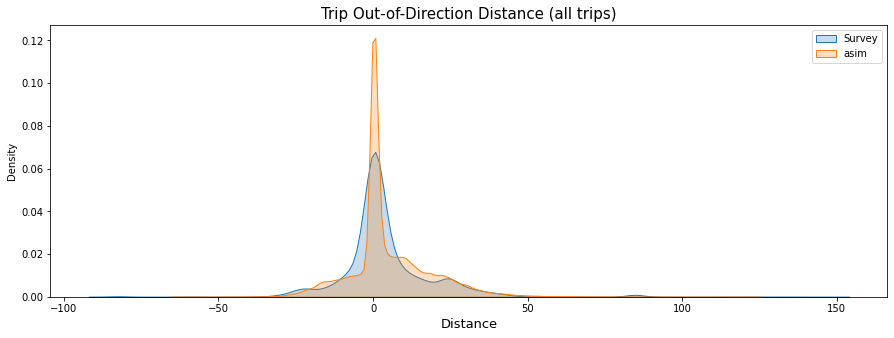

In [93]:
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(Survey_trips_w_dist['outdirection'], label='Survey',weights = Survey_trips_w_dist.sample_rate, ax=ax, fill=True)
sns.kdeplot(asim_trips_w_dist['outdirection'], label='asim', ax=ax, fill=True)
ax.legend()
ax.set_xlabel('Distance', fontsize=13)
ax.set_title('Trip Out-of-Direction Distance (all trips)', fontsize=15)

## Trip Mode

Text(0.5, 0, 'trip mode')

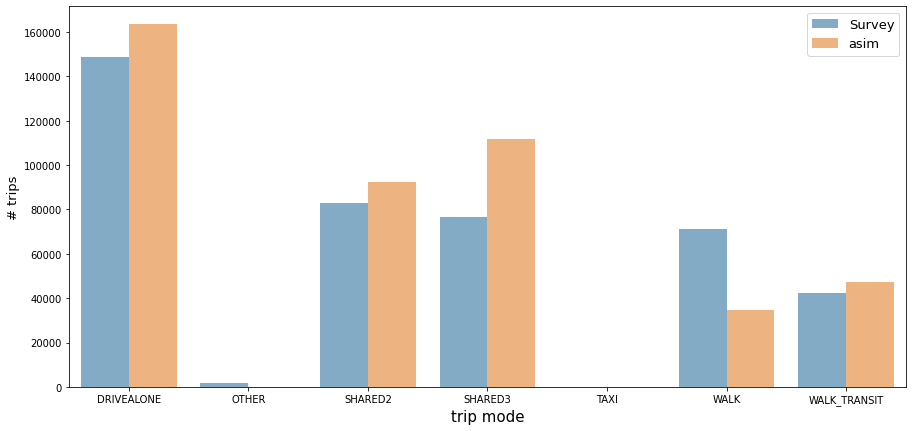

In [94]:
fig, ax = plt.subplots(figsize=(15,7))
trip_mode = asim_trips.groupby('trip_mode')['trip_id'].count()
trip_mode = pd.merge(
    trip_mode, Survey_trips.groupby('trip_mode')['sample_rate'].sum(),
    left_index=True, right_index=True, how='outer').reset_index()
trip_mode.columns = ['trip_mode','asim','Survey']
trip_mode = trip_mode.melt(id_vars='trip_mode',var_name='source',value_name='num_trips')
g = sns.barplot(
    data=trip_mode.sort_values('source'), x='trip_mode', y='num_trips', 
    hue='source', ax=ax, alpha=0.6)
ax.legend(fontsize=13)
ax.set_ylabel('# trips', fontsize=13)
ax.set_xlabel('trip mode', fontsize=15)

###  Trip Mode by Tour Mode

In [95]:
trip_mode = asim_trips.groupby(['trip_mode','tour_mode'])['trip_id'].count().fillna(0)
trip_mode = pd.merge(
    trip_mode, Survey_trips.groupby(['trip_mode','tour_mode'])['sample_rate'].sum().fillna(0),
    left_index=True, right_index=True, how='outer').reset_index()
trip_mode.columns = ['trip_mode','tour_mode','asim','Survey']
trip_mode_long = trip_mode.melt(id_vars=['trip_mode','tour_mode'],var_name='source',value_name='num_trips').fillna(0)

tour_mode_sums = trip_mode_long.groupby(['tour_mode', 'source'])['num_trips'].sum().reset_index()
tour_mode_sums.rename(columns={'num_trips': 'total_trips'}, inplace=True)
trip_mode_long = trip_mode_long.merge(tour_mode_sums, on=['tour_mode','source'])

trip_mode_long['pct_trips'] = trip_mode_long['num_trips'] / trip_mode_long['total_trips']

In [96]:
# with sns.plotting_context("notebook",font_scale=1.3):
#     g = sns.catplot(
#         data=trip_mode_long, x='trip_mode', y='num_trips', col='tour_mode', col_wrap=2, kind='bar',
#         hue='source',alpha=0.6, aspect=1.5, facet_kws={'despine':False})
#     # g.set_yscale("log")
#     g._legend.set_title('')
#     plt.setp(g._legend.get_texts(), fontsize=15)
#     g.set_axis_labels("trip mode", "# trips", fontsize=20)
#     g.fig.subplots_adjust(top=0.9)
#     g.fig.suptitle('Trip Mode by Tour Mode (total)')
#     for ax in g.axes.ravel():
#         ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

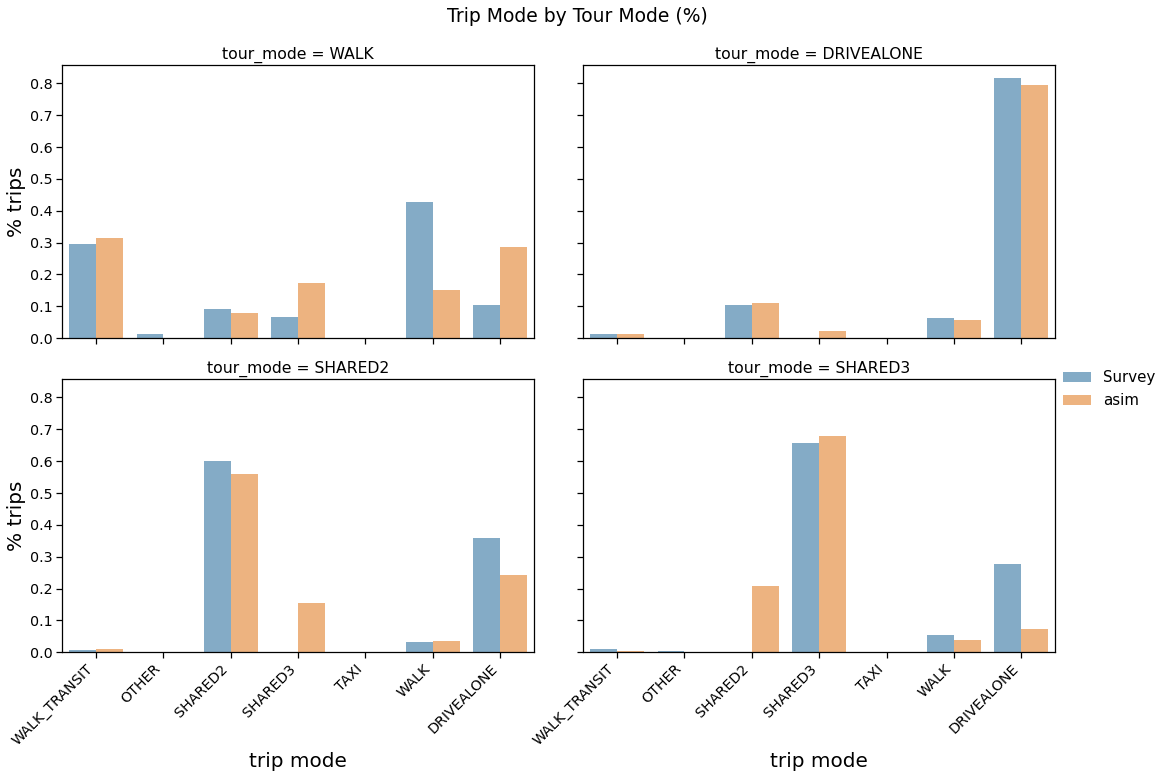

In [97]:
with sns.plotting_context("notebook",font_scale=1.3):
    g = sns.catplot(
        data=trip_mode_long.sort_values('source'), x='trip_mode', y='pct_trips', col='tour_mode', col_wrap=2, kind='bar',
        hue='source',alpha=0.6, aspect=1.5, facet_kws={'despine':False})
    # g.set_yscale("log")
    g._legend.set_title('')
    plt.setp(g._legend.get_texts(), fontsize=15)
    g.set_axis_labels("trip mode", "% trips", fontsize=20)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle('Trip Mode by Tour Mode (%)')
    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [98]:
trippurp_calib = trip_mode_long.groupby(['tour_mode','source','trip_mode'],as_index = False)[['pct_trips']].sum()
# trippurp_calib.loc[trippurp_calib.tour_type.isin(['visit','other']),'tour_type'] = 'visit_other'
trippurp_calib = trippurp_calib.pivot_table(index = ['tour_mode','trip_mode'],
                                                                              values = 'pct_trips',
                                                                              columns = 'source')
trippurp_calib['fac'] = np.log(trippurp_calib['Survey']/trippurp_calib['asim'])
trippurp_calib.to_excel(writer,sheet_name = 'trippurp_calib')
writer.save()
# trippurp_calib.reset_index().groupby('tour_mode')[['Survey','asim']].sum()

C:\Users\hannah.carson\.conda\envs\asimfresh\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [99]:
writer.close()

C:\Users\hannah.carson\.conda\envs\asimfresh\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


### Trip Distance by Trip Mode

In [100]:
asim_trips_w_dist['sample_rate'] = 1
trip_dist_by_mode = pd.concat(
    (asim_trips_w_dist[['trip_mode','sov_dist','source','sample_rate']], Survey_trips_w_dist[['trip_mode','sov_dist','source','sample_rate']]), names=['asim','Survey'])

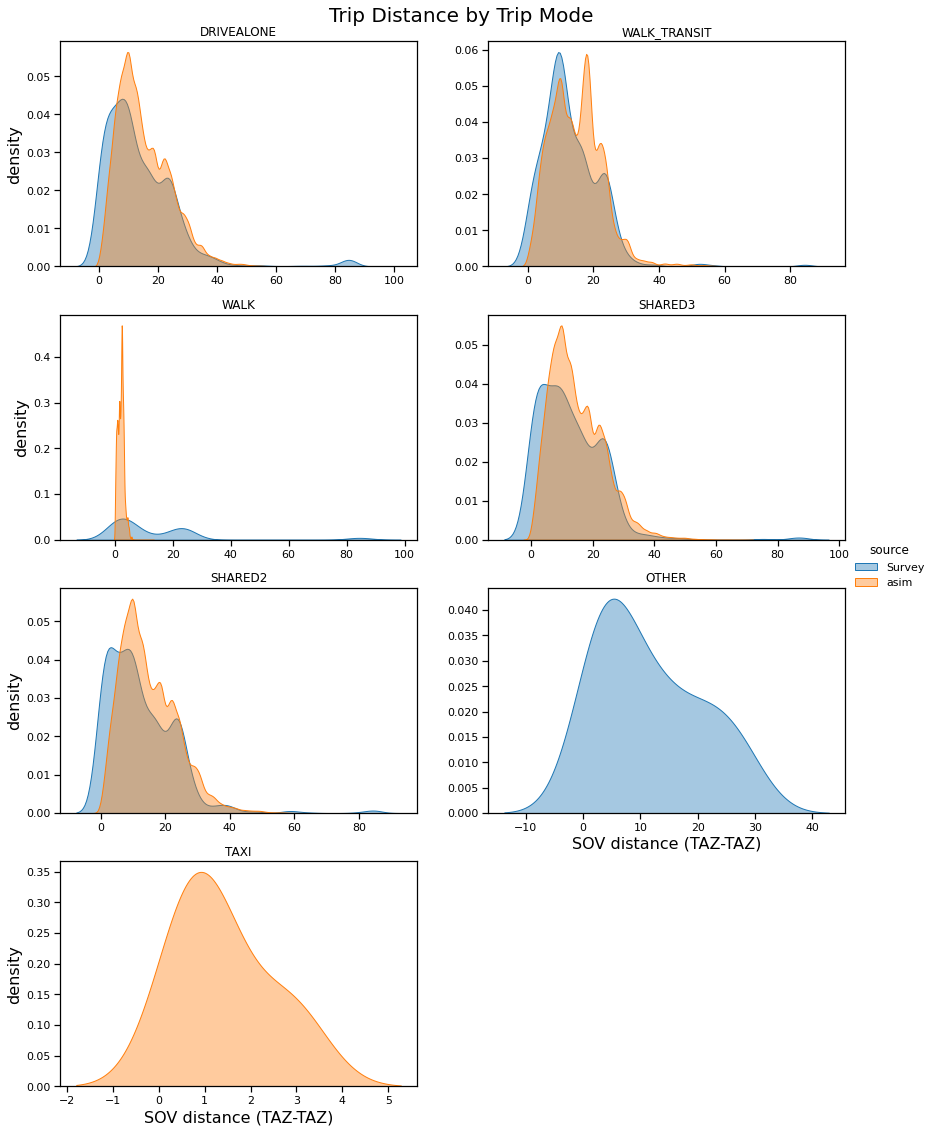

In [101]:
with sns.plotting_context("notebook",font_scale=1):
    g = sns.FacetGrid(trip_dist_by_mode.sort_values('source'), col="trip_mode", col_wrap=2, hue='source',
                      height=4, aspect=1.5,sharex=False, sharey=False, despine=False)
    g.map(sns.kdeplot, "sov_dist", fill=True, alpha=0.4)
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("SOV distance (TAZ-TAZ)", "density", fontsize=16)
    g.add_legend()
    g.fig.subplots_adjust(top=0.95)
    g.fig.suptitle('Trip Distance by Trip Mode',fontsize=20)